# PHYS20762 - Project 3- Penetration of Neutrons Through Shielding

Daniel Thacker <br>
University of Manchester  
April 2021

# Introduction

The purpose of this report is to simulate the penetration of thermal neutrons through materials with different absorbtion and scattering properties. In addition, the processes by which random numbers are generated will be explored, accessing the spread of data compared to expected results, as well as testing for uniformity in random number generators. 

The function provided by numpy, np.random.uniform, will be examined, first via printing a block of numbers and considering the spread of data, then comparing to other forms of random number generation, such as a Linear Congruential Generator (LCG). Spectral problems will be checked for both methods.

Initially, only water will be considered and sample points will be distributed exponentially using a random number generator via the equation $exp(-x/\lambda)$, in an infinite block of water with 0 absorbtion probability. The characteristic attenuation length (the mean free path of a neutron in the material) will be calculated. Thirty repeats of this process will be made to form a standard deviation, which will be included in the weighting of the attenuation length calculation. A histogram and plot will be made to represent this information. 

Random points will be plotted as unit vectors, such that a 3 dimensional sphere is formed. The uniformity will be assessed by eye. This function will be used  again, first to plot the random walk of a particle, in which each step length is distributed as $exp(-x/\lambda)$, then again in the final neutron shield simulation. 

The neutron shield simulation will include full 3 dimensional plots, showing the final positions of each neutron and examples of the random walk the particle takes in the shield. This will be performed for water, lead and graphite. The number of absorbed, reflected and transmitted neutrons will be recorded. Repeats of this calculation will be made in order to calculate a standard deviation, hence the consequence of varying the number of neutrons will be analysed.

The thickness of the shield will be varied, and by using the resultant change in transmitted neutrons, the characteristic attenuation length of each material will be determined, along with the associated uncertainty. This will be performed via an expontential fit, and a polyfit. Both methods will be compared.

Finally, two materials side by side will be simulated and the neutron outcomes will once again be found. This will be performed via the Woodcock method. This involves only considering steps in the smaller mean free path material, and approximating steps in the larger mean free path material with 'ficticious steps' that do not have a chance to be absorbed or change direction during travel. This method will be assessed by creating an infinite mean free path material against lead, and comparing the single material case.

As an additional feature, a programme at the end is set up to allow the user to input their own values for the two thicknesses in the shield and see the resulting scattering. Note this must be ran to completion before any plots will load.

## Background Theory
The Monte Carlo method, named after the casino, is based on the principle of taking many measurements of a random outcome, such that it may be modelled by a probability distribution. It's deviation in results, hence the uncertainty in the outcome, can then be analysed [1]. This is the main aim of this report.

We are assuming two main interactions for neutrons take place within the shield, absorbtion and scattering. This is dependent on the interation cross section of each material, and the number density of molecules in the material. 


### Particle absorbtion and scattering
The number of absorbing molecules in a material can be represented by the equation [1]
### $n = \frac{\rho N}{M}$           (1)                                                 
where $\rho$ is the density of the material, $M$ is the molar mass and $N$ is avogadros number.
The macroscopic crossection of a layer of material is given by $n \sigma$ where $\sigma$ is the microscopic crossection.
The number of neutrons absorbed in a thin layer is therefore
### $N_L = n \sigma I L$          (2)                          
where $I$ is the neutron intensity and $L$ is the thickness.
This expression can be rearranged and represented as a differential equation, which has solution,
### $I(x) = e^{-n\sigma I}$ (3)
or 
### $I = e^{-x/\lambda}$ (4)
where $\lambda $ is the mean free path $\lambda = 1/{n \sigma}$ . For different interactions, such as scattering, the equations are the same, and lambda becomes a sum of each microscopic interaction area ie
### $\lambda = \frac{1}{n(\sigma_{abs} + \sigma_{scatter})}$ (5)
or, calling $\Sigma$ the cross section for a given interaction molecule in the shield, 
###  $\lambda = \frac{1}{\Sigma_{abs} +\Sigma_{scatter}}$ (6)
Equation (4) can be seen as a probability distribution. By integrating it between 2 $x$ values and finding the inverse, a cumulative probability distribtion can be found:
### $cdf^{-1} = -log(1-z)$ (7)
from this, the step length of a single neutron walk can be generated,
### $s_i = -\lambda log(u)$ (8)
in which u is a random number and $s_i$ is the step length of the neutron.

From Equations (6) and (7), the neutron interaction properties of a material can be determined and the corresponding step length can be distributed.

A random number $u$ may be generated. If 
### $u < \frac{\Sigma_a}{\Sigma_a +\Sigma_s}$ (9)
where $a$ and $s$ denote the absorbtion and scattering cross sections of the material, absorbtion occurs.

### Woodcock method and ficticious steps
We will consider how to calculate particle transmission in two different materials. 

Checking whether a neutron has entered each material at each step would require a large amount of processing power. To circumvent this issue, an approximation will be made such that only steps within the smaller mean free path will be considered. In this way, the correpsonding mean free path will not have to be calculated each step. A chance of a ficticious step will be generated when the particle is in the larger mean free path material, such that a neutron will not be able to be absorbed or scattered. 

The probability of taking a ficticious step in the larger mean free path material may be considered:
### $P[f] = \frac{\Sigma_T-\Sigma_s}{\Sigma_T}$ (10)
In which, as before, $\Sigma$ represents the cross section of each interaction molecule, and subscripts $ s$ and $T $ denote the scattering crossection and total crossection repsectively. 
This means a random number may be generated, if it is larger than  $\frac{\Sigma_1}{\Sigma_T}$ 
then is will take a ficious step (since $1-\frac{\Sigma_1}{\Sigma_T}$ would be equally likely for a uniform number generator), if not, normal scattering will occur.

## Imports and parameterization 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#importing and set parameters
import string
import cmath
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as sp
from scipy.stats import expon
from scipy.optimize import curve_fit
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({'font.size': 14})
plt.style.use('default')



## Absorbtion and scattering characteristics 
Characteristics for each material to be used throughout the notebook to calculate the scattering and absorbing probabilities. From [1]

The function for calculating these values is also here.

In [3]:

#Water characteristics
absorption_cross_w = 0.6652 #barn
scatter_cross_w = 103 #barn
density_w = 1 #g per cm^-3
mol_mass_w = 18 #grams per mol

#Lead characteristics
absorption_cross_l = 0.158
scatter_cross_l = 11.221
density_l = 11.35
mol_mass_l = 207.2

#Graphite characteristics
absorption_cross_g = 0.0045
scatter_cross_g = 4.74
density_g = 1.67
mol_mass_g = 12.011

#calculate meanfree path and scatter/ absorb probabilities. Used throughout notebook. 
def calc_material_properties(absorb_cross, scatter_cross, density, mol):
    "function used to calculate the mean free path, scattering and absorbtion chance for each"
    "material. Uses Equations (1) and (5) "
    "Recieves material properties as floats and outputs the path and probabilities."
    
    absorb_cross *= 10**-24 #convert to cm^2
    
    scatter_cross *= 10**-24
    
    #Equation (1)
    n_absorbing = (density*sp.N_A)/mol #number of absorbing molecules

    total_macro_cros = n_absorbing*(absorb_cross + scatter_cross) 

    #Equation (5)
    mean_free_path = 1/total_macro_cros #cm
    
    macro_absorb = (n_absorbing*absorb_cross)
        
    macro_scatter = (n_absorbing*scatter_cross)

    #Equation (9)
    prob_absorbed = macro_absorb /(macro_absorb + macro_scatter)
    
    prob_scatter = macro_scatter /(macro_absorb + macro_scatter)

    return mean_free_path, prob_scatter, prob_absorbed

# Testing generation of random numbers
An array of random numbers will be generated using np.random.uniform and shown. With the same method, an array of 10,000 points will be made and plotted on a histogram to confirm the uniformity of the distribution.

Following a similar method, 3D points will be plotted with random x, y and z coordinates and the uniformity of this distribution of points will be assessed.

<IPython.core.display.Javascript object>


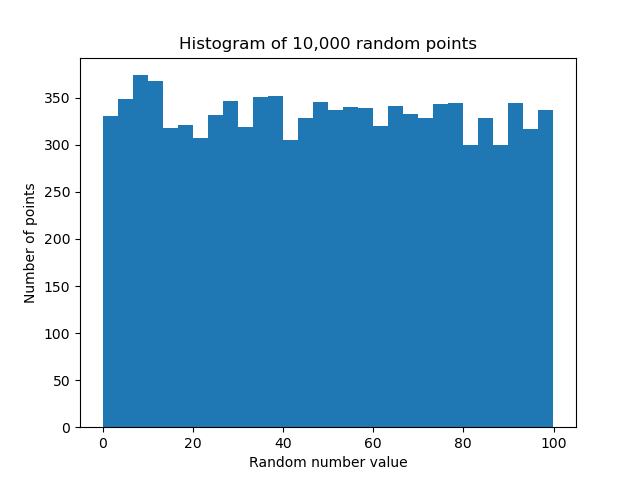

Histogram of 10,000 randomly generated points between 0 and 100 using np.random.uniform. Bins = 30.
 The spread of data appears uniform.


In [4]:
#plot 2 arrays of random numbers, one for plotting and testing uniformity and one for printing
random_numbers = np.random.uniform(0,100,10000) # test np.random.uniform generates random points

random_numbers_print = np.random.uniform(0,30,48)

#plot 10,000 random points
test_uniformity = plt.figure()

test_uniformity = test_uniformity.add_subplot(111)

test_uniformity.hist(random_numbers, 30)

test_uniformity.set_title('Histogram of 10,000 random points')

test_uniformity.set_xlabel('Random number value')

test_uniformity.set_ylabel('Number of points')

#print parameters
print('Histogram of 10,000 randomly generated points between 0 and 100 using np.random.uniform. Bins = 30.'
      '\n The spread of data appears uniform.')


plt.show()


In [5]:
#print 48 random numbers
print('\n Below is a print-out of 48 random numbers between 0 and 30 using the same method of number generation as above.')

print(random_numbers_print)

print('Random numbers, with a mean of ', np.mean(random_numbers_print))

print('----------------------------------------------------')


 Below is a print-out of 48 random numbers between 0 and 30 using the same method of number generation as above.
[18.8755408  17.67382946 18.40861336 11.8791707   6.9706602  27.67195476
  3.21725451 24.97682819  3.20752075  5.49171094 24.97243911 12.50392167
 11.67977858  7.51361295 27.20443487  4.67947815  6.14344725  0.34304012
 16.9564944   0.52137961  7.14336607 27.72821939 28.88928724 20.93149234
  0.82194946 19.67259367 19.42761598 22.85287676 13.42782145 27.2570238
  1.95129105  7.59922238 14.43995477  2.96195831 28.09158588 12.43453202
 25.5008726   9.39100026  4.13999694  1.19597548  3.83666302 18.53724811
  6.54272526 14.71803893 13.19128219  2.99254852 16.96371434 12.84398856]
Random numbers, with a mean of  13.257832399367961
----------------------------------------------------


<IPython.core.display.Javascript object>


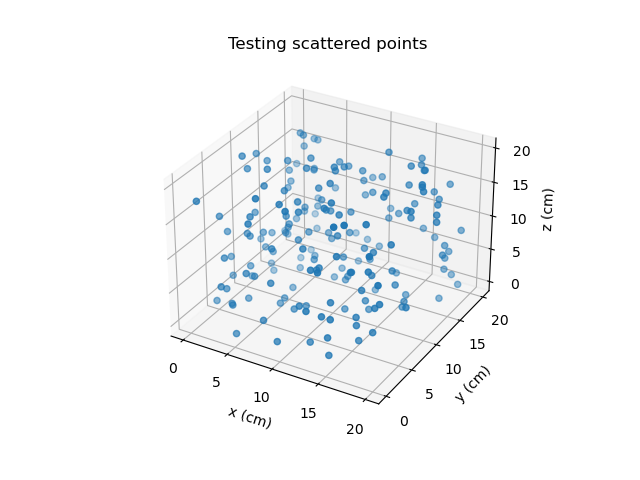

Shows randomly distributed points in a 3D cube of side lengths 20cm. The units cm are used arbitrarily


In [6]:

def plot_scatter_points(x_coords, y_coords, z_coords):
    "Accepts randomly generated x, y and z coordinates and plots them on a 3D graph"
    tester_fig = plt.figure()

    test_scatter = tester_fig.add_subplot(111, projection='3d')

    test_scatter.scatter(x_coords, y_coords, zs=z_coords, zdir='z', s=20)

    test_scatter.set_title('Testing scattered points')

    test_scatter.set_xlabel('x (cm)')
    
    test_scatter.set_ylabel('y (cm)')

    test_scatter.set_zlabel('z (cm)')

    plt.show()
    


def scatter_points(n):
    "Generates random scattered points to be plotted on a 3D graph. Calls the plot_scatter_points function"
    "to plot."
    
    x_coords = np.random.uniform(0,20,n)

    y_coords = np.random.uniform(0,20,n)

    z_coords = np.random.uniform(0,20,n)

    plot_scatter_points(x_coords, y_coords, z_coords)


    
scatter_points(200)
print("Shows randomly distributed points in a 3D cube of side lengths 20cm. The units cm are used arbitrarily")

Plotting 200 scattered points between 0 and 20 using np.random.uniform. 

The scattered points appear to be uniform in distribution. The points are evenly spread such that there are no dense clumps or plains. Rotating the image, there is no bias for particular plains.

This implies there is no spectral bias. This is the tendency for LCG's [2], to favour plotting discrete plains in 3 dimensions.

Spectral bias will be demonstrated below using randssp provided by [1].

<IPython.core.display.Javascript object>


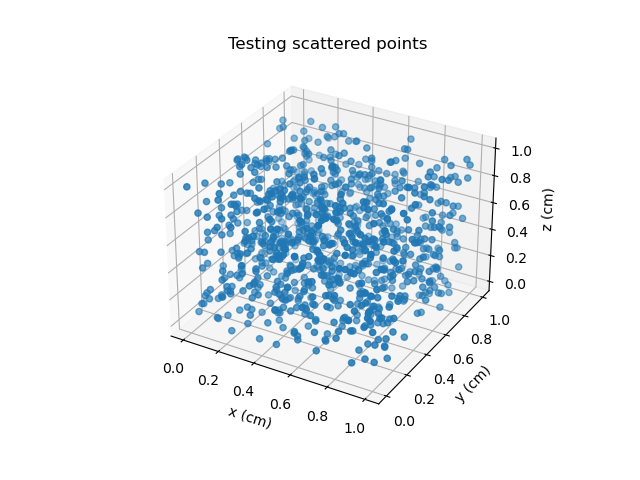

1000 points generated using randssp, an LCG, to observe spectral issues. Again, cm are used arbitrarily


In [7]:

def randssp(p,q):
    "A function provided by [1]. Shows an LCG with statistical bias. "
    "Accepts dimensions for a 2D array of randomly generated points."
    
    global m_, a_, c_, x_
        
    try: x_
    except NameError:
        m_ = pow(2, 31)
        a_ = pow(2, 16) + 3
        c_ = 0
        x_ = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x_ = np.mod(a_*x_ + c_, m_)
            r[k, l] = x_/m_
    
    return r

#plot sequentially generated points on a 3 dimensional graph to demonstrate the spectral issue
points = randssp(3,1000)

x_point, y_point, z_point = points[0,:], points[1,:], points[2,:]

plot_scatter_points(x_point, y_point, z_point)

print('1000 points generated using randssp, an LCG, to observe spectral issues. Again, cm are used arbitrarily')



From this graph it is evident the spectral issue is present. Rotating the graph such that the view is pointing towards the 0,0 coordinates for y and x, distinct 3 dimensional plains are seen. This is due to how the LCG generates the random points. 

The purpose of this exercise was to demonstrate the uniformity of the random number generator used throughout this notebook, np.random.uniform, and that this spectral problem does not occur. 

We will further the analysis of the np.random.uniform by generating an exponetial distribution via the generation of many random numbers and using the cumulative distribution from Equation (7).


## Random number generation according to $exp(-x/\lambda)$

Below is a function that distributes points as $e^{(-x/ \lambda)}$. This is analogous to the survival probability of a particle with mean free path $\lambda$.

This is a test of randomness, to check that the output of np.random.uniform from Equation (7) can be recalculated to obtain the input $\lambda$ term. A mean will be calculated using Equation (5) for water, with $\sigma_{abs} =$ 0.6652 barn and $\sigma_{scatter} =$ 0 barn i.e assuming no absorbtion within the neutron walk.

The code operates as follows:
- A mean free path using the above parameters will be calculated for water
- An array of n random numbers with N repeats will be made and distributed via the inverse of $exp(-x/\lambda)$, i.e $-\lambda log(x)$
- A histogram using the number density of these points will be made
- The mean particle number and $x$ value (cm) for each repeat will be found and a standard deviation for these values will be found as well
- All zeros will be removed from the particle number (the correpsonding $x$ values will be removed) such that $log(particle \hspace{0.1cm} number)$ against $x$ can be plotted
- A linear fit using np.polyfit will be found for these data with weighting $\frac{mean}{\sigma}$ where $\sigma$ is the standard deviation
- From this, the mean free path will be calculated
- This will be repeated using data from a single repeat, rather than the mean particle number and $x$ values, to observe how this changes the calculated mean free path

<IPython.core.display.Javascript object>


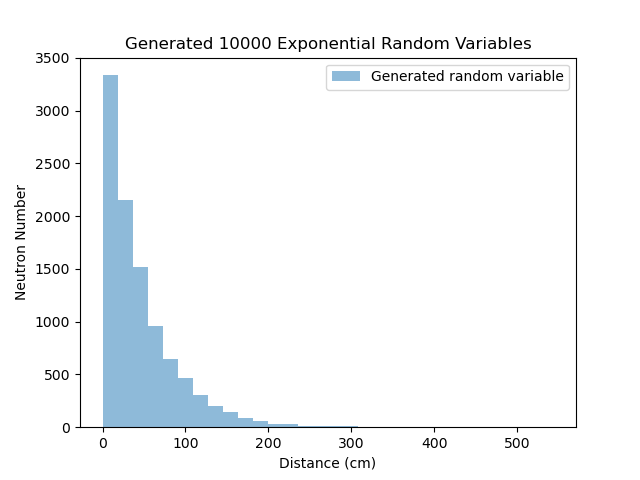

The mean free path is 44.9186 cm. Compared to calculated path of 44.9334 cm
The fitting error for this value is +/- 0.000032 cm, from polyfit covariance matrix


<IPython.core.display.Javascript object>


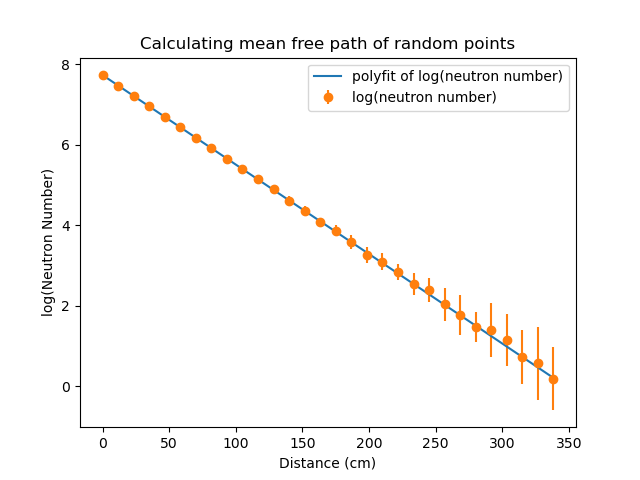

After 30 repeats, using 10,000 particles each. The blue line is polyfit of the data, while orange dots are mean number of  neutrons in each x distance range (cm) after 30 repeats, approximated from a histogram function


In [8]:

def exponential_inverse(n, mean, bins, repeats):
    "Function that distributes n random points according to Equation (7)"
    "Plots the resulting distribution on a histogram."
    "Recieves n random points to be plotted, given a mean over which to distribute them (correpsonds to lambda"
    "in Equation (7)). Also accepts number of bins and number of repeats for each distribution."
    "Returns a reshaped array of all the distributed points such that they may be iterated through to find the"
    "std and mean of each bin value."
    
    #Set an array for 10 arrays of n exponentially distributed numbers
    #From this, a standard deviation may be calculated
    X_values = np.array([])
    
    #repeat a number of times to obtain a standard deviation for each point
    for _ in range(repeats):
        
        random_numbers = np.random.uniform(0,1,n)

        #from Equation (7)
        X = -mean*np.log(random_numbers)
        
        X_values = np.append(X_values, X)
    
    #Reshape random points such that it is easier to run along each row to find the mean and std of each y value
    X_values = X_values.reshape(repeats,n) 
    
    #plot a histogram of a single repeat of the exponential distribution
    hist_fig = plt.figure()

    hist = hist_fig.add_subplot(111)
    
    hist.hist(X_values[0], bins=bins, alpha=0.5, label="Generated random variable")
    
    hist.set_title("Generated %i Exponential Random Variables" %n)
    
    hist.legend()
    
    hist.set_xlabel('Distance (cm)')
    
    hist.set_ylabel('Neutron Number')
    
    plt.show()
    
    return X_values

def remove_zeros(y_vals, x_distance):
    "Removes the zeros from one array and deletes the corresponding elements from another array of the same size"
    "Used for the histogram mean free path calculation and the attenuation length calculation, so a log can"
    "be taken."
    "Accepts and returns two 2D arrays."
    
    zero_elements = np.where(y_vals<=1)
    
    #delete zero and 1 element so a log can be taken
    y_vals_1 = np.delete(y_vals, zero_elements)
    
    x_distance_1 = np.delete(x_distance, zero_elements)
    
    return y_vals_1, x_distance_1


def find_std(values, rows, columns):
    "Find the standard deviation and mean of a large list of repeated data with number of repeats equal to"
    "'rows' and x data equal to 'columns'. Iterates over each row."
    "Returns standard deviation, mean and the correpsonding reshaped data set"
    
    #Shape arrays such that one horizontal row is 1 set of y data, making it easier it iterate through each one
    values = values.reshape(rows, columns) 
    
    means = np.array([])
    
    stds = np.array([])
    
    #run along each row and find the std and mean for each repeat
    for i in range(len(values[0,:])):
        
        stds = np.append(stds, np.std(values[:,i]))
        
        means = np.append(means, np.mean(values[:,i])) 
            
    return stds, means, values

def polyfitting(x_vals_array, y_vals_array, plot_means, repeats, bins):
    "Calls the find_std and remove_zeros functions to calculate the polyfit, thus the polyval, of the histogram data."
    "plot_means == 1 results in the calculated means from the repeats being plotted "
    "and the meanfreepath being plotted from this data. Else, just the first data set of x and y values "
    "will be plotted, but the std weight will be the same."
    "Returns the x and y arrays with zeros removed and the associated polyval and std"
    
    #find the standard deviation and mean of each row of x and y data
    dummy, means_x, x_vals_array  = find_std(x_vals_array, repeats, bins)

    stds, means, y_vals_array = find_std(y_vals_array, repeats, bins)

    #Remove the zeros for y and the correpsonding x and std elements to be plotted
    #include all repeats in calculation
    if plot_means == 1:
        
        y_values_1, stds_1 =  remove_zeros(means, stds)

        dummy, x_values_1 =  remove_zeros(means, means_x)

    #include only the first data set, with the same std
    else:
        
        y_values_1, stds_1 =  remove_zeros(y_vals_array[0,:], stds)

        dummy, x_values_1 =  remove_zeros(y_vals_array[0,:],x_vals_array[0,:])

    #perform polyfit of data. Weight with normalised standard deviation values.
    polyfit, covr = np.polyfit(x_values_1, np.log(y_values_1), deg=1, full=False, cov=True, w=(1/(stds_1/y_values_1)))
    
    polyval = np.polyval(polyfit,  x_values_1)
    
    mfp_error = np.sqrt(np.diag(covr))[0]
    
    print('The mean free path is {0:4.4f} cm. Compared to calculated path of {1:4.4f} cm'.format(-1/polyfit[0], mean_free_path_w))
    
    print('The fitting error for this value is +/- {0:4.6f} cm, from polyfit covariance matrix'.format(mfp_error))
    
    return x_values_1, y_values_1, polyval, stds_1



def calc_meanfreepath(X, plot_means, repeats, bins, range_):
    "Calculates the meanfree path of a distribution of points (X)."
    "Splits the distribution into a number density corresponding to a set of x values using np.histogram"
    "Finds mean of standard deviation of each bin. Gives a range overwhich to perform the histogram function."
    "plot_means is passed to the polyfitting function."
    "Returns the x and y arrays with zeros removed and the associated polyval and std"
    
    y_vals_array = np.array([])
    
    x_vals_array = np.array([])
    
    for x_vals in X:
        
        #np.histogram separates the x value and number of times this occurs along chosen bin sizes
        y_vals, x_distance = np.histogram(x_vals, bins=bins, range=(0, range_))
        
        #remove last x data point since np.histogram adds end point of last bin to position array
        x_distance = np.delete(x_distance, bins)
        
        y_vals_array = np.append(y_vals_array, y_vals)
        
        x_vals_array = np.append(x_vals_array, x_distance)
        
    #returns gradient of log(neutrons) against distance
    x_values_1, y_values_1, polyval, stds_1 = polyfitting(x_vals_array, y_vals_array, plot_means, repeats, bins)
  
    return  x_values_1, y_values_1, polyval, stds_1

def plot_meanpath(x_distance, y_vals, polyval, stds, shielding, title):
    "Simple function that plots the log of neutron number and x distance"
    "Accepts the x values from Equation (8), plus the log(y value) from the resulting histogram."
    "Also takes in the polyval calculated from the log of the y_values and compares the 2 data sets,"
    "along with the associated mean of each point (normalised.)"
    "If shielding == 1 this function is used for the attenuation calculation for the shielding," 
    "thus the title is changed."
    
    meanpath_fig = plt.figure()

    meanpath = meanpath_fig.add_subplot(111)
    
    meanpath.plot(x_distance, polyval, label='polyfit of log(neutron number)')
    
    meanpath.errorbar(x_distance, y_vals, yerr=stds, fmt='o', label='log(neutron number)')
    
    meanpath.set_xlabel('Distance (cm)')
    
    meanpath.legend()
    
    if shielding == 1:
        
         meanpath.set_title('Calculating attenuation length of ' + title)
        
         meanpath.set_ylabel('log(Fraction transmitted neutrons)')
    else:

        meanpath.set_title('Calculating mean free path of random points')

        meanpath.set_ylabel('log(Neutron Number)')
    
    plt.show()


BINS = 30

REPEATS = 30

# calculate meanfreepath in absence of absorbtion (absorbtion probability 0)
mean_free_path_w = calc_material_properties(absorption_cross_w, 0, density_w, mol_mass_w)[0] 

#X_vals is a reshaped array of 30 repeats of 10,000 distributed points
X_vals = exponential_inverse(10000, mean_free_path_w, BINS, REPEATS)

#find x values, log of number of neutrons, mean free path and standard deviation for each bin
distance, number_neutrons, polyvals, strd_devs = calc_meanfreepath(X_vals, 1, REPEATS, BINS, 350)

#plot linear fit of the distribution
plot_meanpath(distance, np.log(number_neutrons), polyvals, strd_devs/number_neutrons, 0, 0)

print('After', REPEATS, 'repeats, using 10,000 particles each. The blue line is polyfit of the data, while orange dots are' 
      ' mean number of  neutrons in each x distance range (cm) after 30 repeats, approximated from a histogram function')

The log of each mean particle number is plotted against mean $x$ distance for 30 repeats with 10,000 neutrons. The standard deviations for each repeated data set was found and was used to weight the polyfit. A visible and clear straight line is seen with an increasing error as the distance becomes further from the mean value of 45 cm. The standard deviations are not visible before 150 cm, suggesting very little deviation in distribution for these values of distance.

A histogram of the mean data is also shown. Roughly 68% of the values should be within 1 standard deviation of the mean, since the spread of bins follows a normal distribution. This is expected trend is observed for the histogram, since the inputted mean free path of 44.9 cm sees the more dense distribution of points, exponentially trailing off.

Note the covariance matrix from the polyfit has provided a very small, unreasonable error for the mean free path. It is not clear why this is. The polyfit has been weighted by the mean values divided by the standard deviation, and the standard deviations appear sensible on the graph. 

We will now explore what happens when just one sample from one repeat of this distribution is fitted to the linear equation, rather than the mean y and x values. The standard deviations from the repeats will still be used to weight the polyfit. We expect there to be a greater variance in this distribution, since outliers will be given more weight, as means are not taken. 

The mean free path is 45.6687 cm. Compared to calculated path of 44.9334 cm
The fitting error for this value is +/- 0.000232 cm, from polyfit covariance matrix


<IPython.core.display.Javascript object>


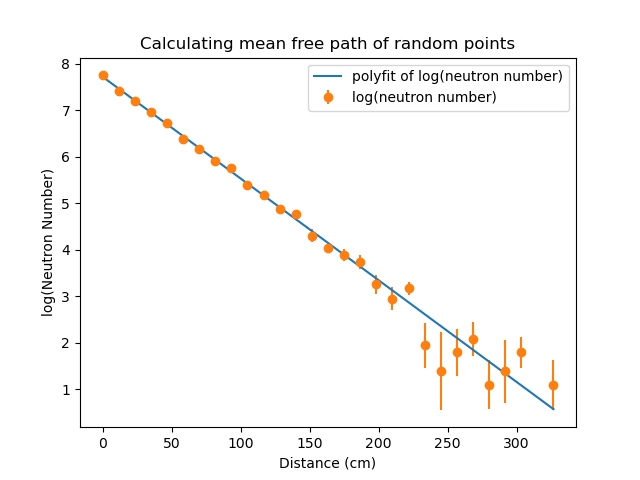

After 30 repeats, using 10,000 particles each, using y and x data from one repeat. Blue line is polyfit of each repeat,      while orange dots are number of neutrons in each x range for one repeat, from a histogram function. Standard deviations are still calculated from 30 repeats.


In [9]:

distance, number_neutrons, polyvals, strd_devs = calc_meanfreepath(X_vals, 0, REPEATS, BINS, 350)

plot_meanpath(distance, np.log(number_neutrons), polyvals, strd_devs/number_neutrons, 0 ,0)

print('After', REPEATS, 'repeats, using 10,000 particles each, using y and x data from one repeat. Blue '
      'line is polyfit of each repeat,      while '
      'orange dots are number of neutrons in each x range for one repeat, from a histogram function.'
     ' Standard deviations are still calculated from', REPEATS,'repeats.')


Both mean free path graphs have the same statistical weight (standard deviation) but have different $x$ and $y$ values.

It is clear the mean values provide a more uniform distribution, with a lower standard deviation. The single data set has a distribution of points with higher standard deviation, and is further away from the true value. This is most likely because deviation from the mean result is given more weight for the polyfit, hence will have a higher chance of calculating a more innaccurate mean free path. The points for the non-mean plotted data are further away from the linear fit line.

Once again, the polyfit has provided a strangely small error for the mean free path. Changing the number of neutrons and repeats does not seem to effect this.

The purpose of this exercise was to demonstrate that running random numbers and distributing them by an inverse distribution results in deviations from the orignal parameters by which the points were distributed. A sample size of many more random points would have to be used in order to achieve the same value of mean free path reliably.

The uniformity of np.random.uniform will be once more put to the test by plotting a 3 dimensional sphere using generated random points.

# Plotting random points for a sphere

Presented below is a function that generates isotropic unit vectors from a uniform random distribution. This will not only demonstrate uniformity of the generated points, but will also serve as a demonstration of how neutron direction will be calculated in the final shield simulation.

This will be achieved for $n$ random points by converting cartesian coordinates into spherical polars, and distributing the $n$ points for $\phi$ across 0 and $2\pi$ and $cos(\theta)$ across -1 and 1, such that,

x = $cos(\phi)sin(\theta)$

y = $sin(\theta)sin(\phi)$

z = $cos(\theta)$

<IPython.core.display.Javascript object>


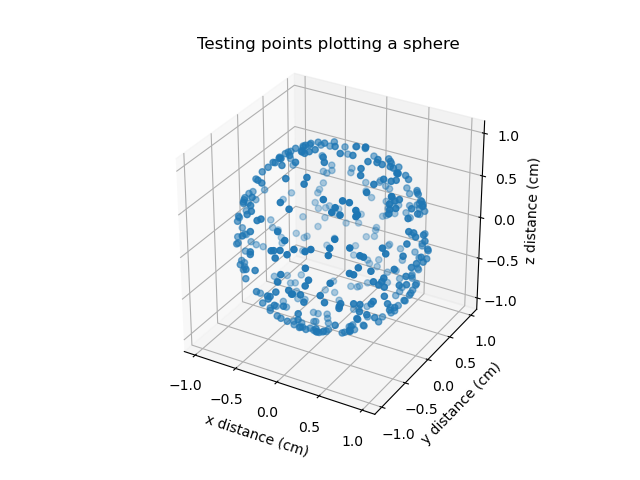

400 generated random points on a sphere of 1cm radius. 


In [10]:

def sphere_plotting(n):
    "Plots n random points by creating values of phi and cos theta in the above equations."
    "Returns 3D cartesian coordinates."
    "Used for the shield simulation and random walk to determine a random direction for which the particle"
    "will move."
    
    phi, costheta = np.random.uniform(0,2*np.pi, n), np.random.uniform(-1,1, n)
    
    theta = np.arccos(costheta)
    
    x = np.cos(phi)*np.sin(theta)
    
    y = np.sin(theta)*np.sin(phi)
    
    z = np.cos(theta)
     
    return x, y, z

#Now plot a sphere with r distributed as e^(x/lambda)
def sphere_graph(x_sphere, y_sphere, z_sphere):
    "Plots a 3D graph of the sphere points, calculated from sphere_plotting." 
    
    sphere_fig = plt.figure()

    sphere = sphere_fig.add_subplot(111, projection='3d')

    sphere.scatter(x_sphere, y_sphere, zs=z_sphere, zdir='z', s=20)

    sphere.set_box_aspect((1, 1, 1))

    sphere.set_title('Testing points plotting a sphere')

    sphere.set_xlabel('x distance (cm)')

    sphere.set_ylabel('y distance (cm)')

    sphere.set_zlabel('z distance (cm)')

    plt.show()    
    
#Plot a sphere of uniformly distributed points 
x_sphere, y_sphere, z_sphere = sphere_plotting(400)

sphere_graph(x_sphere, y_sphere, z_sphere)

print('400 generated random points on a sphere of 1cm radius. ')

A clear uniform distribution is seen for the sphere. There is no bias in the poles of the sphere and no spectral problem as observed earlier in the report for the LCG.

This distribution will now be used to plot a random walk for a particle, with step length disributed via $exp(-x/\lambda)$.

## Plot a particle random walk for fixed step number
Using the above function for randomly distributing the particle direction, we will simulate a particle taking a step with length distributed according to $exp(-x/\lambda)$. Starting at the origin, a fixed number of steps will be taken. A similar method will be used later for the full simulation of the particle.

<IPython.core.display.Javascript object>


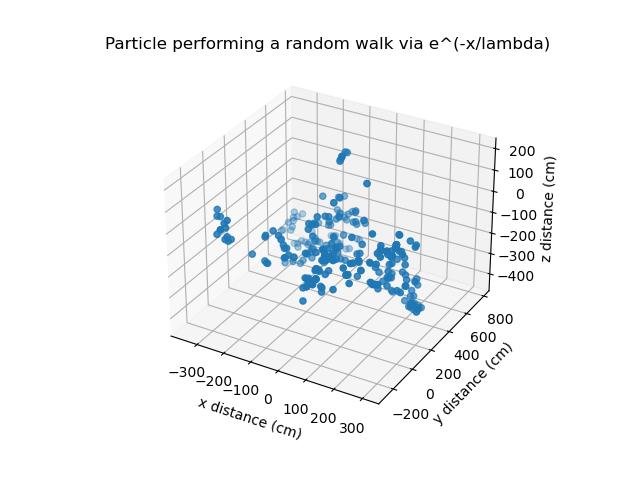

Single particle walk with 300 steps with mean free path 44.93 cm


In [11]:

def random_walk(n, mean): 
    "Creats the coordinates for a random walk of a particle with a set number of steps"
    "Distibutes the step length according to Equation (7)"
    "Accepts the number of steps and the mean over which to distribute the steps."
    "Returns the list of 3D coordinates for which the particle walk can be plotted."
    
    rand_x = np.random.uniform(0,1,n)
    
    #generate random step lengths distibuted exponentially
    X  = -mean*np.log(rand_x)
    
    #generate a random direction for each step
    x_steps, y_steps, z_steps = sphere_plotting(n)
    
    coord_x = np.zeros(n)
    
    coord_y = np.zeros(n)
    
    coord_z = np.zeros(n)
    
    #iterates over the steps and step lengths, adding a length each time.
    for i, xs, ys, zs, length in zip(range(n-1), x_steps, y_steps, z_steps, X):
        
        coord_x[i+1], coord_y[i+1], coord_z[i+1] = (coord_x[i]+length*xs), (coord_y[i]+length*ys), (coord_z[i]+length*zs)
        

    return coord_x, coord_y, coord_z


def rand_walk_graph(coord_x, coord_y, coord_z):
    "Plots the calculated coordinates of the random walk on a 3D graph."
    "Accepts 3D points from random_walk"
    
    sphere_mean_fig = plt.figure()

    sphere_mean = sphere_mean_fig.add_subplot(111, projection='3d')

    sphere_mean.scatter(coord_x, coord_y, zs=coord_z, zdir='z', s=20)

    sphere_mean.set_title('Particle performing a random walk via e^(-x/lambda)')

    sphere_mean.set_xlabel('x distance (cm)')

    sphere_mean.set_ylabel('y distance (cm)')

    sphere_mean.set_zlabel('z distance (cm)')

    plt.show()

#calculate coords for 300 steps over a mean free path of water without absorbtion
coord_x, coord_y, coord_z = random_walk(300, mean_free_path_w)

#plot the coords
rand_walk_graph(coord_x, coord_y, coord_z)

print('Single particle walk with 300 steps with mean free path {0:4.2f} cm'.format(mean_free_path_w))


The particle walk is shown above. The expected shape is seen, with the particle 'snaking' forward with an unpredictable jerky motion. The same method used above will be used to simulate the neutron path in the shield, except each step there will be chance of absorbtion for the particle.

In this scenario, water is simulated with 0 scattering chance (no absorbtion) in an infinite block.

Both methods shown, creating a sphere and generating random step lengths, will now be used to complete a full simulation of particle interaction in a shield.

# Simulating thermal neutrons through a shield
Below is the simulation for neutron shielding. The simulation works on a number of assumptions.
For instance, all steps are isotropic in direction, meaning they can be at any angle. The step size, however, is distributed via $exp(-x/\lambda)$. We also apply a one-group approximation, such that each neutron is considered to have the same energy, and each cross section has been calculated to account for this [3]. The neutron energy is unchanging throughout the simulation, each collision will be considered elastic. There are no interactions with the material beyond absorbtion and scattering (ignoring pair production, for instance).

These assumptions allow us to observe a simple model of how neutrons move in a shield, without high computation time.

Neutron bombardment for 10 cm of water, lead and graphite will be analysed, using data provided from [1]. 
#### The simulation works as follows:


- A direction is chosen for the particle using the spherical plotting function used previously. The first step is only in the positive $x$ direction.

- A step length is chosen via the dsitribution $exp(-x/\lambda)$

- The particle position is updated with these parameters

- The function checks that the particle has not left the shield, considering the $x$ coordinate and the thickness of the shield. If it has left the slab, kill the particle and save the final position to an array.

- If it has survived, choose either scattering or absorbtion by selecting a random number between 0 and 1. If it is less than the absorbtion probability, then it is absorbed and the particle is killed.

- If it scatters, repeat the process until the neutron is killed.

- If print_statement == 2, a single particle random walk will be shown for the shield using the function plot_final_positions. The function fraction_history will print how the particle died

- If print_statment == 1, the final positions of each neutron will be plotted using plot_final_positions. The function fraction_history will count along the final $x$ positions to determine the fraction of absorbed, reflected and transmitted neutrons. This information will be printed along with the associated normally distributed error. We will determine in a later section how accurate the normal distribution is for the neutron history.



In [12]:

def plot_final_positions(
    thickness_1,thickness_2, final_positions_x, final_positions_y, final_positions_z, title, print_statement, woodcock):
    "If print_statement == 1, accepts the final position coordinates of each particle and plots them. "
    "Also takes in the thickness of the material and plots the wall as a wire mesh.'"
    "If print_statement == 0 this function takes in the stored x y and z coordinates of a single particle walk and plots"
    "them with a changed title."
    "If woodcock == 1 same procedure except this accepts 2 thicknesses and creates 3 walls"
    "Accepts a title for each material to change the labels on the displayed graph."

    #set coordinates of the walls to be plotted 
    wall_y_vals = np.linspace(-40,40,100)
    
    wall_z_vals = np.linspace(-40,40,100)
    
    wall_y, wall_z = np.meshgrid(wall_y_vals, wall_z_vals)
    
    #plot the final coordinates of each particle

    double_wall_fig = plt.figure()

    double_wall = double_wall_fig.add_subplot(111, projection='3d')
    
    #plot the stream of particles entering the shield
    double_wall.plot([0,-5], [0,0], zs=[0,0], color='b', label='start', alpha =0.99)
    
    #plot the walls, if woodcock: plot an additional one
    if woodcock == 1:
        
        double_wall.plot_wireframe(thickness_2+thickness_1, wall_y, wall_z, rstride=18, cstride=10)
    
    double_wall.plot_wireframe(thickness_1, wall_y, wall_z, rstride=18, cstride=10)
    
    double_wall.plot_wireframe(0, wall_y, wall_z, rstride=18, cstride=10)
    
    #If plotting final positions of all neutrons
    if print_statement == 1: 
        
        double_wall.scatter(final_positions_x, final_positions_y, zs=final_positions_z, color='r', alpha=0.4)
        
        double_wall.set_title('Final positions of each thermal neutron in 10cm of ' + title)
    
    #if plotting random walk, set a different title
    else:  
        #plot the x,y,z coords as a line, showing the movement of the particle. Plot start and end points
        double_wall.plot(final_positions_x, final_positions_y, zs=final_positions_z, color='r')
        
        double_wall.scatter(final_positions_x[-1], final_positions_y[-1], zs=final_positions_z[-1], color='k', label='end')
        
        double_wall.set_title('Random walk of a thermal neutron in 10cm of ' + title)
        
    double_wall.legend()
        
    double_wall.set_xlabel('x distance (cm)')

    double_wall.set_ylabel('y distance (cm)')

    double_wall.set_zlabel('z distance (cm)')
    
    plt.show()
       
    
def fraction_history(x_positions, title_1, print_statement, thickness_1, thickness_2, neutron_number, woodcock):
    "Iterates over the final x positions of all neutrons in the shield and finds out how they died."
    "Returns the number of transmitted, reflected and absorbed neutrons."
    "If print_statement == 2, the reason of death of a single particle is printed"
    "If print_statement == 1 the end fractions are printed instead and approximated error"
    "Woodcock == 1 allows the 2nd thickness material  to be considered, and returns absorbtion data for the "
    "second material as well."
    
    #set variables to count over
    reflected_neutrons = 0

    absorbed_neutrons_1 = 0
    
    absorbed_neutrons_2 = 0

    transmitted_neutrons = 0

    #count up fraction of neutrons absorbed, reflected or transmitted
    for position in x_positions:

        if position <= 0:

            reflected_neutrons += 1 

        elif thickness_1 > position >= 0: 

            absorbed_neutrons_1 += 1
            
        elif woodcock == 1:

            if (thickness_2 + thickness_1) >= position > thickness_1:
            
                absorbed_neutrons_2 += 1
            else:
                
                transmitted_neutrons += 1

        else:

            transmitted_neutrons += 1
    
    #if plotting final positions for many neutrons
    if print_statement == 1:
        
        print('Thickness:', thickness_1+thickness_2, 'cm')
        
        print('Total neutrons', neutron_number)

        print('Fraction of absorbed neutrons for {0} in first material is {1:4.2f}. Neutron number: {2} +/-{3:4.0f}'.format(
            title_1, absorbed_neutrons_1/neutron_number, absorbed_neutrons_1, np.sqrt(absorbed_neutrons_1)))
        
        #if using woodcock method, print a term for the 2nd material
        if woodcock == 1:
            print('Fraction of absorbed neutrons for {0} in second material is {1:4.2f}. Neutron number: {2} +/-{3:4.0f}'.format(
                title_1, absorbed_neutrons_2/neutron_number, absorbed_neutrons_2, np.sqrt(absorbed_neutrons_2)))

        print('Fraction of reflected neutrons for {0}  is {1:4.2f}. Neutron number: {2} +/-{3:4.0f}'.format(
            title_1, reflected_neutrons/neutron_number, reflected_neutrons, np.sqrt(reflected_neutrons)))

        print('Fraction of transmitted neutrons for {0}  is {1:4.2f}. Neutron number: {2} +/-{3:4.0f}'.format(
            title_1, transmitted_neutrons/neutron_number, transmitted_neutrons, np.sqrt(transmitted_neutrons)))
        
    #If a random walk is called for, print the reason of particle death
    if print_statement == 2:
        
        if reflected_neutrons == 1:
            
            death_reason = 'reflection'
            
        elif absorbed_neutrons_1 == 1:
            
            death_reason = 'absorbtion in first material'
            
        elif absorbed_neutrons_2 ==1:
            
            death_reason = 'absorbtion in second material'
            
        else:
            
            death_reason = 'transmission'
            
        print('The particle ended the random walk via', death_reason)
        
        print(thickness_1+thickness_2, 'cm of', title_1)
    #if using the woodcock method, return 2 absorbed fractions
    if woodcock == 1:
        
        return absorbed_neutrons_1, absorbed_neutrons_2, reflected_neutrons, transmitted_neutrons
    
    else:
        
        return absorbed_neutrons_1, reflected_neutrons, transmitted_neutrons

def shield_simulation(mean_free_path, absorb_prob, neutron_number, thickness, title, print_statement):
    "Takes in the mean free path, thickness, name and scattering probability of the material."
    "Plots the final positions of all particles by iterating over each neutron."
    "If print_statment == 1 a summary of particle history is printed"
    "If print_statement == 2 a random walk of the particle is shown, along with reason for "
    "particle death"
    "print_statement == 0 plots nothing."
    "Returns fraction of transmitted, absorbed and reflected neutrons, from fraction history function."
    
    #array to iterate over 
    neutron_array = np.arange(0, neutron_number)
    
    #set an array of final positions to record
    final_positions_x = np.array([])
    
    final_positions_y = np.array([])
    
    final_positions_z = np.array([])
    
    #iterates over all neutrons
    for _ in neutron_array:
        
        is_absorbed = 0
        
        i = 0 #number of steps
        
        #set up empty arrays for coordinates
        coord_x = np.array([])

        coord_y = np.array([])

        coord_z = np.array([])
        
        #set intial conditions
        coord_x = np.append(coord_x, 0)
        
        coord_y = np.append(coord_y, 0)
        
        coord_z = np.append(coord_z, 0)
    
        #particle killed at is_absorbed = 1
        while is_absorbed == 0:
            
            rand_x = np.random.uniform(0,1)
    
            #generate random step length distibuted exponentially
            X  = -mean_free_path*np.log(rand_x)

            #travels only in x direction on first contact. Z and Y directions remain the same
            if i==0:
                
                x_step = 1
                
                y_step = 0
                
                z_step = 0
                
            #take a step, using the generated step length and direction  
            i = i + 1
            
            coord_x = np.append(coord_x, coord_x[i-1]+X*x_step)

            coord_y = np.append(coord_y, coord_y[i-1]+X*y_step)

            coord_z = np.append(coord_z, coord_z[i-1]+X*z_step)
              
            #check neutron has left the shield
            if coord_x[i] < 0 or coord_x[i] > thickness:
                
                final_positions_x = np.append(final_positions_x, coord_x[i])
                
                final_positions_y = np.append(final_positions_y, coord_y[i])
                
                final_positions_z = np.append(final_positions_z, coord_z[i])
                
                is_absorbed = 1 #ends the loop for this particular neutron
            
            #determine if absorbed or scattered. If the random number is less than the absorb
            #probability then it is absorbed. 
            elif np.random.uniform(0,1) < absorb_prob:
                
                final_positions_x = np.append(final_positions_x, coord_x[i])
                
                final_positions_y = np.append(final_positions_y, coord_y[i])
                
                final_positions_z = np.append(final_positions_z, coord_z[i])
                
                is_absorbed = 1
                
            else:
                
                #generate a new direction for the particle and repeat the process
                x_step, y_step, z_step = sphere_plotting(1)
                
        #plot random walk                        
        if print_statement == 2:
                  
            plot_final_positions(THICKNESS,0, coord_x, coord_y, coord_z, title, print_statement, 0)
            
    #plot final positions
    if print_statement == 1:
    
        plot_final_positions(THICKNESS, 0, final_positions_x, final_positions_y, final_positions_z, title, print_statement, 0)

    #find the fraction of absorbed, reflected and transmitted neutrons
    neutron_data = fraction_history(final_positions_x, title, print_statement, thickness, 0, neutron_number, 0)
    
    return neutron_data

THICKNESS = 10 # cm

NEUTRON_NUMBER = 1000

#calculate mean free path, absorption and scatter probabilities for water
mean_free_path_w2, prob_scatter_w, prob_absorb_w  = calc_material_properties(
    absorption_cross_w, scatter_cross_w, density_w, mol_mass_w)

#for lead
mean_free_path_l, prob_scatter_l, prob_absorb_l  = calc_material_properties(
    absorption_cross_l, scatter_cross_l, density_l, mol_mass_l)

#for graphite
mean_free_path_g, prob_scatter_g, prob_absorb_g = calc_material_properties(
    absorption_cross_g, scatter_cross_g, density_g, mol_mass_g)


# Examples of particle random walks within the shield

Below is the random walk of a single neutron in each material. The user is encouraged to run this cell a number of times to observe the movement of the neutron in all scenarios, such as being immediately reflected or transmitted through the material.

Note: arguement print_statement == 2 enables this.


<IPython.core.display.Javascript object>


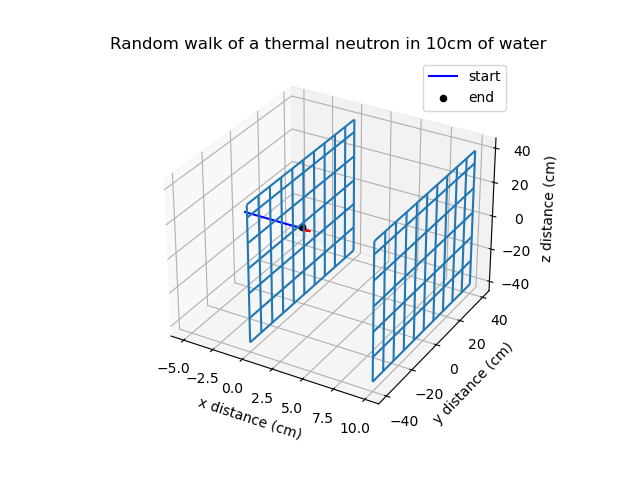

The particle ended the random walk via reflection
10 cm of water


<IPython.core.display.Javascript object>


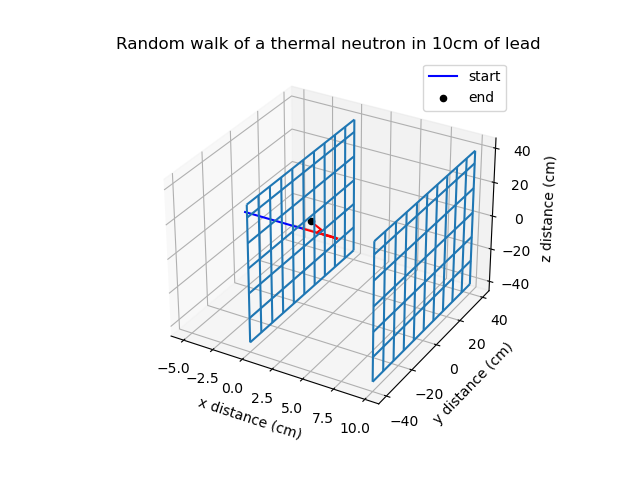

The particle ended the random walk via reflection
10 cm of lead


<IPython.core.display.Javascript object>


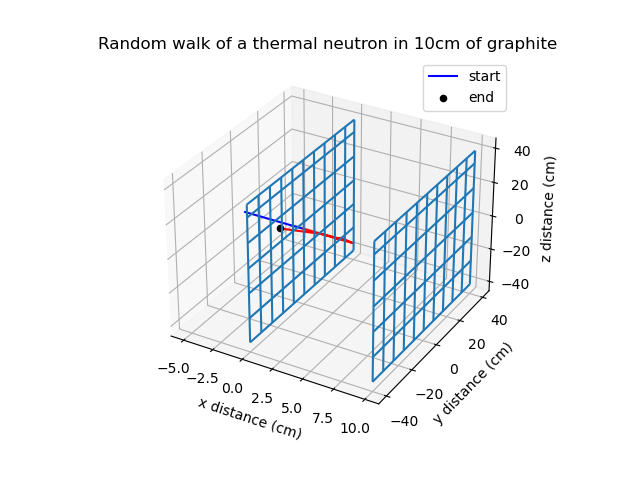

The particle ended the random walk via reflection
10 cm of graphite
-----------------------------------------------------------
Graphs of random walks for 1 neutron through the shield with 10 cm of water, lead and graphite
-----------------------------------------------------------
Mean free path for water: 0.2883 cm
Mean free path for lead: 2.6640 cm
Mean free path for graphite:2.5172 cm
-----------------------------------------------------------
Scatter probability for water: 0.9936 
Scatter probability for lead: 0.9861 
Scatter probability for graphite: 0.9991 
-----------------------------------------------------------
Blue wire mesh shows the walls of the material. Red line shows particle walk. 


In [13]:
shield_simulation(mean_free_path_w2, prob_absorb_w, 1, THICKNESS, 'water', 2);

shield_simulation(mean_free_path_l, prob_absorb_l, 1, THICKNESS, 'lead', 2);

shield_simulation(mean_free_path_g, prob_absorb_g, 1, THICKNESS, 'graphite', 2);

print('-----------------------------------------------------------')

print('Graphs of random walks for 1 neutron through the shield with 10 cm of water, lead and graphite')
print('-----------------------------------------------------------')
print('Mean free path for water: {0:4.4f} cm'.format(mean_free_path_w2))
print('Mean free path for lead: {0:4.4f} cm'.format(mean_free_path_l))
print('Mean free path for graphite:{0:4.4f} cm'.format(mean_free_path_g))
print('-----------------------------------------------------------')
print('Scatter probability for water: {0:4.4f} '.format(prob_scatter_w))
print('Scatter probability for lead: {0:4.4f} '.format(prob_scatter_l))
print('Scatter probability for graphite: {0:4.4f} '.format(prob_scatter_g))
print('-----------------------------------------------------------')
print('Blue wire mesh shows the walls of the material.'
     ' Red line shows particle walk. ')

It appears, from running this simulation a number of times, water has a high scattering rate and will lose many neutrons due to reflection. Lead and graphite take on average larger step sizes and the neutrons generally survive for longer. This is to be expected since lead and graphite have the much higher mean free paths, over ten times as high. This means the particle in water will have to take many more steps to achieve transmission.

To see a better graphical and statistical interpretation of these results, the final positions for 1000 neutrons will be plotted. 

## Final positions of 1000 neutrons in each material
The final positions of each neutron are represented with a small red counter. 

print_statement == 1 means graphs for many final positions will be shown.
### Water

<IPython.core.display.Javascript object>


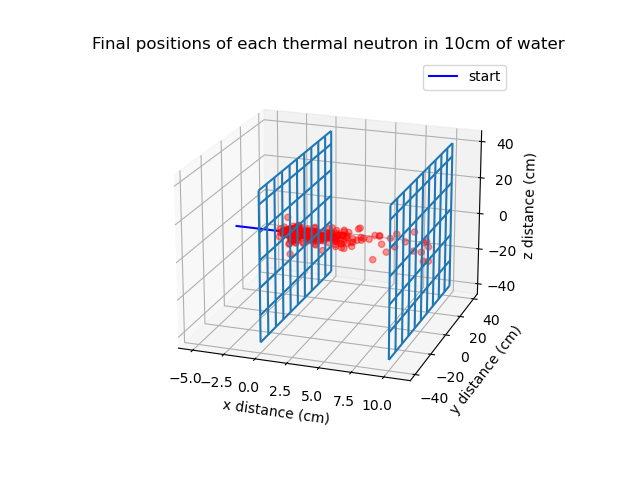

Thickness: 10 cm
Total neutrons 1000
Fraction of absorbed neutrons for water in first material is 0.21. Neutron number: 209 +/-  14
Fraction of reflected neutrons for water  is 0.78. Neutron number: 784 +/-  28
Fraction of transmitted neutrons for water  is 0.01. Neutron number: 7 +/-   3

 Red counters: 
 -behind the start position show reflected neutrons,
 -passed the second wall show transmitted  
 -within the shield absorbed neutrons  


In [14]:
shield_simulation(mean_free_path_w2, prob_absorb_w, NEUTRON_NUMBER, THICKNESS, 'water', 1);
print('\n Red counters: \n -behind the start position show reflected neutrons,'
      '\n -passed the second wall show transmitted  \n -within the shield are absorbed neutrons  ')

### Lead

<IPython.core.display.Javascript object>


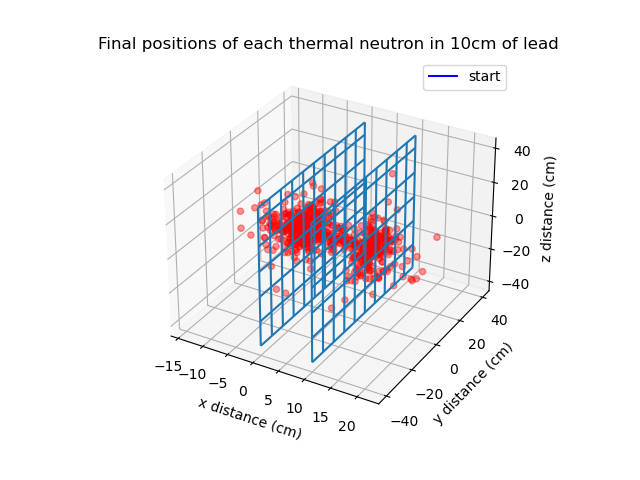

Thickness: 10 cm
Total neutrons 1000
Fraction of absorbed neutrons for lead in first material is 0.10. Neutron number: 97 +/-  10
Fraction of reflected neutrons for lead  is 0.61. Neutron number: 610 +/-  25
Fraction of transmitted neutrons for lead  is 0.29. Neutron number: 293 +/-  17

 Red counters: 
 -behind the start position show reflected neutrons,
 -passed the second wall show transmitted  
 -within the shield absorbed neutrons  


In [15]:
shield_simulation(mean_free_path_l, prob_absorb_l, NEUTRON_NUMBER, THICKNESS, 'lead', 1);
print('\n Red counters: \n -behind the start position show reflected neutrons,'
      '\n -passed the second wall show transmitted  \n -within the shield are absorbed neutrons  ')

### Graphite

<IPython.core.display.Javascript object>


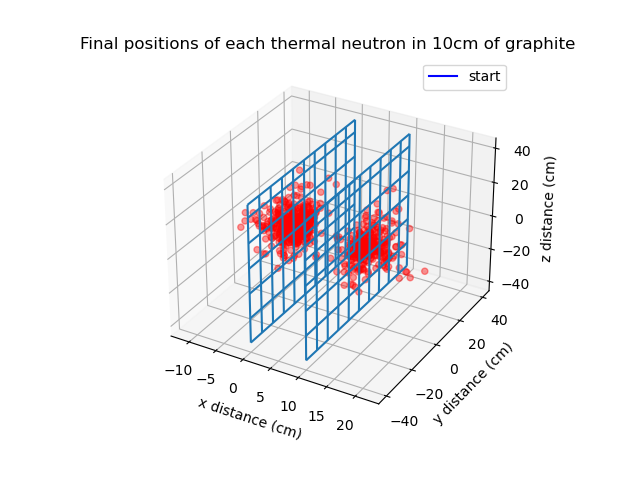

Thickness: 10 cm
Total neutrons 1000
Fraction of absorbed neutrons for graphite in first material is 0.01. Neutron number: 8 +/-   3
Fraction of reflected neutrons for graphite  is 0.67. Neutron number: 671 +/-  26
Fraction of transmitted neutrons for graphite  is 0.32. Neutron number: 321 +/-  18

 Red counters: 
 -behind the start position show reflected neutrons,
 -passed the second wall show transmitted  
 -within the shield absorbed neutrons  


In [16]:
shield_simulation(mean_free_path_g, prob_absorb_g, NEUTRON_NUMBER, THICKNESS, 'graphite', 1);
print('\n Red counters: \n -behind the start position show reflected neutrons,'
      '\n -passed the second wall show transmitted  \n -within the shield are absorbed neutrons  ')

In the above figure, the error for each neutron outcome is modelled as a normal distribution and is the root of the counts for that outcome. It is debatable at what neutron number the neutron outcomes may be modelled as a normal distribution, we will explore this further later in the notebook.

The graphs for shielding are seen above for 1000 neutrons for each material. Water shows the greatest difference in outcome for the 3 materials, showing very little transmission and mostly reflection. This is predictable since it has the much lower mean free path. Water also has a higher fractional error for the transmitted fraction of neutrons for the same reason; there is a lot of statistical variance for how long a neutron will surive in water compared to graphite and lead. 

Graphite and lead appear fairly similar, with a higher proportion of neutrons being absorbed for lead, which makes sense since the scatting probability for lead is higher.

## Error variation with neutron number
We will now make an assessment of the accuracy of each neutron outcome by taking 5 repeats for varying amounts of neutrons with 10cm of shielding for each material. The standard deviations and means of each particle history (absorbed, scattered, transmitted) will be calculated, such that we have a direct estimate of the simulation error. 

The standard deviation of each repeat will be compared to the root of the counts, hence an assessment of the accuracy of modelling the particles by a normal distribution will be made.

Repeats for 1000, 2000 and 5000 neutrons will be made 5 times each.

In [17]:
def calculate_standard_dev(mean_free_path, mean_free_path_2, absorb_prob, absorb_prob_2,
             neutron_number, thickness, thickness_2, repeats, title, woodcock):    
    "Used for both Woodcock method and shield simulation. Takes the repeats of each simulation and finds"
    "the standard deviation and mean of each one"
    "If woodcock == 0 the functions finds the stds and means for the shield_simulation"
    "prints the results. If woodcock == 1 the same procedure is followed except an additional absorbtion "
    "array is used."
    "Prints a ticket including all neutron information and outcomes."
    
    #set empty arrays for each neutron data for each repeat to go into
    absorbed_array = np.array([])
    
    transmission_array = np.array([])
    
    reflected_array = np.array([])
    
    absorbed_2_array = np.array([])

    #For the single material case, not woodcock, iterate over the repeats and find the particle history fractions
    if woodcock == 0:
    
        for _ in range(repeats):

            absorbed, reflected, transmitted = shield_simulation(
                mean_free_path, absorb_prob, neutron_number, thickness, title, 0)

            absorbed_array = np.append(absorbed_array, absorbed)

            transmission_array = np.append(transmission_array, transmitted)

            reflected_array = np.append(reflected_array, reflected)
            
    #If printing data for the woodcock method instead, include an additional absorbed array 
    else: 
        
        for _ in range(repeats):

            absorbed, absorbed_2, reflected, transmitted = woodcock_method(
                 mean_free_path, mean_free_path_2, absorb_prob, absorb_prob_2,
                 neutron_number, thickness, thickness_2, title, 0)

            absorbed_array = np.append(absorbed_array, absorbed)

            absorbed_2_array = np.append(absorbed_2_array, absorbed_2)

            transmission_array = np.append(transmission_array, transmitted)

            reflected_array = np.append(reflected_array, reflected)
    
    #calculate the means and standard deviations from each repeat
    absorbed_mean = np.mean(absorbed_array)
    
    trans_mean = np.mean(transmission_array)

    reflected_mean = np.mean(reflected_array)

    absorbed_std = np.std(absorbed_array)

    trans_std = np.std(transmission_array)

    reflected_std = np.std(reflected_array)
    
    #Print a ticket with all the results
    print('------------------------------')
    
    #If analysing woodcock method, print the absorbed quantities for both thicknesses
    if woodcock == 0:
        
        print('After 5 repeats using ' + title)

        print('Thickness:', thickness, 'cm')
    
    else:
        
        print('After 5 repeats through', title)
                
        absorbed_2_mean = np.mean(absorbed_2_array)
        
        absorbed_2_std = np.std(absorbed_2_array)
        
        print('Thickness one', thickness, ' cm and thickness two', thickness_2, 'cm')

    print('Total neutrons', neutron_number)

    print('Mean absorbed neutrons in first material: {0:4.2f} with standard deviation {1:4.2f}. Normal distribution error: {2:4.2f}. \n Fraction absorbed: {3:4.4f} +/- {4:4.3f}'.format(
        absorbed_mean, absorbed_std, np.sqrt(absorbed_mean), (absorbed_mean/neutron_number),(absorbed_std)/neutron_number))
    
    if woodcock == 1:

        print('Mean absorbed neutrons in second material {0:4.2f} with standard deviation {1:4.2f}. Normal distribution error: {2:4.2f}. \n Fraction absorbed: {3:4.4f} +/- {4:4.3f}'.format(
            absorbed_2_mean, absorbed_2_std, np.sqrt(absorbed_2_mean), (absorbed_2_mean/neutron_number), (absorbed_2_std)/neutron_number))
            
    print('Mean reflected neutrons: {0:4.2f} with standard deviation {1:4.2f}. Normal distribution error: {2:4.2f}. \n Fraction reflected: {3:4.4f} +/- {4:4.3f}'.format(
        reflected_mean, reflected_std, np.sqrt(reflected_mean), reflected_mean/neutron_number, (reflected_std)/neutron_number))

    print('Mean transmitted neutrons: {0:4.2f} with standard deviation {1:4.2f}. Normal distribution error: {2:4.2f}. \n Fraction transmitted: {3:4.4f} +/- {4:4.3f}'.format(
        trans_mean, trans_std,  np.sqrt(trans_mean), trans_mean/neutron_number, (trans_std)/neutron_number))

    

NEUTRON_NUMBER_LIST =  1000, 2500, 5000

#Find the std and mean for each neutron number for each material
for neutrons in NEUTRON_NUMBER_LIST:
    
    calculate_standard_dev(mean_free_path_g,0, prob_absorb_g, 0, neutrons, THICKNESS, 0, 5, 'graphite',  0)

    calculate_standard_dev(mean_free_path_l,0, prob_absorb_l, 0,  neutrons, THICKNESS, 0,  5, 'lead', 0)

    calculate_standard_dev(mean_free_path_w2,0, prob_absorb_w, 0,neutrons, THICKNESS, 0, 5, 'water', 0)

------------------------------
After 5 repeats using graphite
Thickness: 10 cm
Total neutrons 1000
Mean absorbed neutrons in first material: 8.00 with standard deviation 0.89. Normal distribution error: 2.83. 
 Fraction absorbed: 0.0080 +/- 0.001
Mean reflected neutrons: 698.60 with standard deviation 15.87. Normal distribution error: 26.43. 
 Fraction reflected: 0.6986 +/- 0.016
Mean transmitted neutrons: 293.40 with standard deviation 15.03. Normal distribution error: 17.13. 
 Fraction transmitted: 0.2934 +/- 0.015
------------------------------
After 5 repeats using lead
Thickness: 10 cm
Total neutrons 1000
Mean absorbed neutrons in first material: 95.40 with standard deviation 11.69. Normal distribution error: 9.77. 
 Fraction absorbed: 0.0954 +/- 0.012
Mean reflected neutrons: 622.20 with standard deviation 14.76. Normal distribution error: 24.94. 
 Fraction reflected: 0.6222 +/- 0.015
Mean transmitted neutrons: 282.40 with standard deviation 7.94. Normal distribution error: 16.80


## Discussion
Summary data for each neutron number repeat is shown above. Standard deviation for each repeat is seen and compared to root of the counts, to determine how similar the observed standard deviation and normal distribution approximation are.

Fractional error is highest when at 1000 neutrons. This is unsurprising, as more weight is given to fluctuations in expected result. It also appears as neutron number increases, the fractional error in neutron count decreases, for a similar reason.
The general result is seen that as neutron number increases, the standard deviation of the particle outcome decreases.

To maintain a low computation time, only neutron numbers up to 5000 were used. Repeated test were also made at 10,000 and 20,000 neutrons before the submission of this report. The results of this procedure are discussed below.

It seems the Normal distribution error approximation over estimates compared to the actual calculated value for some values. There is a large deviation from normal and standard uncertainty difference. Occasionally it is very similar, sometimes the Normal approximation is double that of the standard deviation. For instance, relfected neutrons at 20,000 had a standard deviation 57, and Normal approximation 112, while for absorbtion the difference in these values is 16. This difference in uncertainty seems to increase as neutron number increases, suggesting the deviation from the mean value decreases faster for higher neutrons than the normal model predicts.

The fractional error for 10,000 and 20,000 neutrons was similar, for instance fraction transmitted for water was 0.0032 +/- 0.001 and 0.0031 +/- 0.001 respectively, suggesting the accuracy of the simulation reaches a cap at a certain neutron number. Comparing this to 1000 neutrons, value of 0.0040 +/- 0.002 was found, about 20% deviation from the result at 20,000 neutrons. This suggest there is a significant difference in result when high neutron numbers are used.

We are limited by computation ability, as a sample size much higher than is reasonable would have to be used to be statistically confident that the particle outcome may be modelled perfectly as a gaussian. However, it can be said to a reasonable approximation that the particles may be normally distributed.


# Varying thickness of the shield

Now we will vary the thickness of the shield and calculate the variation in neutron transmission, reflection and absorption. The characteristic attenuation length will be calculated for each material via curve fitting the fraction of transmitted neutrons using the equation $exp(-x/\lambda)$ where $\lambda $ is the characteristic attenuation length and $x$ is the thickness of the shield.

A thickness range between 0.01 and 7.51 cm will be tested for water, since this will give a large spread of results to form a distinct exponential curve. Thicknesses beyond 10 cm see very little deviation in reflected and absorbed particles, with very few particles being transmitted.

For lead and graphite, thickness values between 0.01 and 24 cm will be used. This is for a similar reason as water, it will provide a reasonable looking exponential curve, showing a large variation of transmission and reflection values. The sample size we must work with forces quite a large variation in transmission rates, meaning there is a high statistical error with these values. To see a much more accurate curve, neutron numbers far higher than reasonable would have to be used [2].

The understanding of how thermal neutron attenuation changes with thickness is of importance in, for instance, a nuclear reactor. The correct amount of lead shielding must be used to prevent neutrons from escaping the reactor, while also minimising the cost of materials. 


<IPython.core.display.Javascript object>


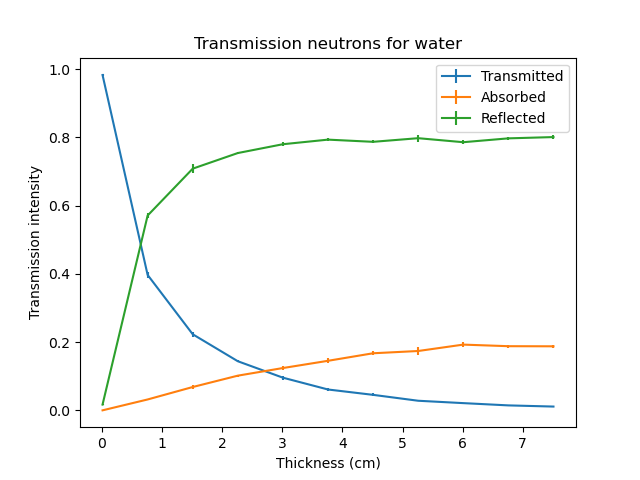

After 5 repeats using water
For thicknesses: [0.01 0.76 1.51 2.26 3.01 3.76 4.51 5.26 6.01 6.76 7.51] cm
Total neutrons per repeat: 2500
-------------------------------------------


<IPython.core.display.Javascript object>


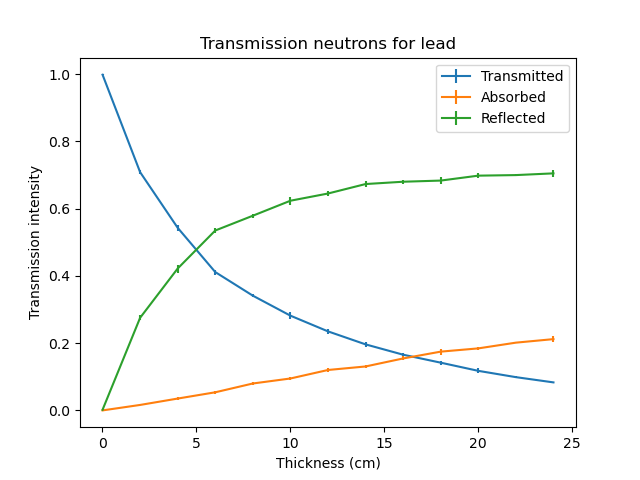

After 5 repeats using lead
For thicknesses: [1.000e-02 2.010e+00 4.010e+00 6.010e+00 8.010e+00 1.001e+01 1.201e+01
 1.401e+01 1.601e+01 1.801e+01 2.001e+01 2.201e+01 2.401e+01] cm
Total neutrons per repeat: 2500
-------------------------------------------


<IPython.core.display.Javascript object>


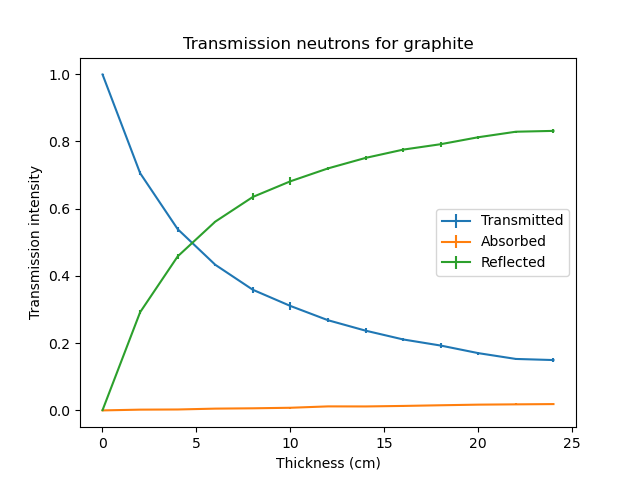

After 5 repeats using graphite
For thicknesses: [1.000e-02 2.010e+00 4.010e+00 6.010e+00 8.010e+00 1.001e+01 1.201e+01
 1.401e+01 1.601e+01 1.801e+01 2.001e+01 2.201e+01 2.401e+01] cm
Total neutrons per repeat: 2500
-------------------------------------------


In [18]:

def thickness_repeats(mean_free_path, prob_absorb, neutron_number, thicknesses, title, repeats):
    "Takes in the parameters to simulate a particle walk, along with a range of thickness values "
    "for which to iterate through for each repeat. "
    "Calls find_std function to find the mean and std of each repeat, and remove_zeros so a log can be taken"
    "Finds and returns std and mean for each particle outcome, normalised by the number of neutrons used."
    
    transmitted_n_array = np.array([])
    
    absorbed_n_array = np.array([])
    
    reflected_n_array = np.array([])
    
    #iterate over each repeat and thickness to find the std and mean of each
    for _ in range(repeats):
    
        for thickness in thicknesses:
            
            absorbed, reflected, transmitted = shield_simulation(mean_free_path, prob_absorb, neutron_number, thickness, title, 0)

            transmitted_n_array = np.append(transmitted_n_array, transmitted)
            
            absorbed_n_array = np.append(absorbed_n_array, absorbed)
            
            reflected_n_array = np.append(reflected_n_array, reflected)
 
    #find standard deviation and mean of each sample
    transmitted_std, mean_transmitted_n, trans_data = find_std(transmitted_n_array,  repeats, len(thicknesses))
    
    absorbed_std, mean_absorbed_n, absorbed_data = find_std(absorbed_n_array,  repeats, len(thicknesses))
    
    reflected_std, mean_reflected_n, reflected_data = find_std(reflected_n_array,  repeats, len(thicknesses))
    
    #remove zeros so the data can be plotted to an exponential
    mean_transmitted_n_1, thicknesses_1 = remove_zeros(mean_transmitted_n, thicknesses)
                                                   
    dummy, transmitted_std_1 = remove_zeros(mean_transmitted_n, transmitted_std)
    
    #Plot each outcome fraction for each material
    transmission_fig = plt.figure()
    
    transmission = transmission_fig.add_subplot(111)
        
    transmission.errorbar(
        thicknesses,  mean_transmitted_n/neutron_number, yerr=transmitted_std/neutron_number, fmt='-', label='Transmitted')
        
    transmission.errorbar(
        thicknesses,  mean_absorbed_n/neutron_number, yerr=absorbed_std/neutron_number, fmt='-', label='Absorbed')
        
    transmission.errorbar(
        thicknesses,  mean_reflected_n/neutron_number, yerr=reflected_std/neutron_number, fmt='-', label='Reflected')
   
    transmission.set_title('Transmission neutrons for ' + title)
    
    transmission.set_xlabel('Thickness (cm)')
    
    transmission.set_ylabel('Transmission intensity')
    
    transmission.legend()
    
    plt.show()
    
    #show print statement for parameters of each graph
    print('After 5 repeats using', title)
    
    print('For thicknesses:', thicknesses, 'cm')
    
    print('Total neutrons per repeat:', neutron_number)
    
    print('-------------------------------------------')
    
    #normalise mean and std to number of neutrons 
    return mean_transmitted_n_1/neutron_number, thicknesses_1, transmitted_std_1/neutron_number

#Choose a different array for water, since it has a very low transmission probability
thicknesses_forwater = np.arange(0.01,8, 0.75) #cm

#thicknesses for graphite and lead
thicknesses = np.arange(0.01, 25 ,2)

#return the mean transmitted intensity, thickness and stds with zeros removed for every repeat
trans_water, thicknesses_w, trans_std_w = thickness_repeats(
    mean_free_path_w2, prob_absorb_w, 2500, thicknesses_forwater, 'water', 5)

trans_lead, thicknesses_l, trans_std_l = thickness_repeats(
    mean_free_path_l, prob_absorb_l, 2500, thicknesses, 'lead', 5)

trans_graphite, thicknesses_g, trans_std_g = thickness_repeats(
    mean_free_path_g, prob_absorb_g, 2500, thicknesses, 'graphite', 5)


## Discussion

Elements where there are 0 transmitted neutrons have been removed at the end of the calculation (after plotting) such that an exponential fit of the data can be made. Error bars can be too small to see at low fractions of absorbtion.

From the graphs above, it appears absorbtion is the least dependent on thickness, showing a slight increase for water and graphite and a larger increase for lead. This could be the case because lead has about ten times the density of the other materials, with graphite having a much lower absorbtion cross section.

A similar trend is seen for every material. Transmission and reflection are very dependent on thickness, with reflection being the main reason for particle death at lower thicknesses and vice versa for high thickness. This makes intuitive sense, since the particle has more chance over time in a thicker material to be scattered and leave.

A lower range of thicknesses was used for water, as it was observed that higher thicknesses used for graphite and lead produced little change in absorbed and reflected neutrons. There were no or very few transmitted neutrons at these thicknesses for water. 


The fraction of transmitted neutrons will be fitted to an exponential via scipi.optimize.curve_fit, to find the characteristic attenuation length for each material. The results for this will be compared to a polyfit of the logarithm of the transmitted neutrons, and the two methods of attenuation determination will be assessed.

A function will be made of the form $exp(-x/\lambda)$ as mentioned above and will be called from another function which uses scipi.optimize.curve_fit and plots the resulting fit on a graph for each material, weighting the fit with the mean divided by the standard deviation.

<IPython.core.display.Javascript object>


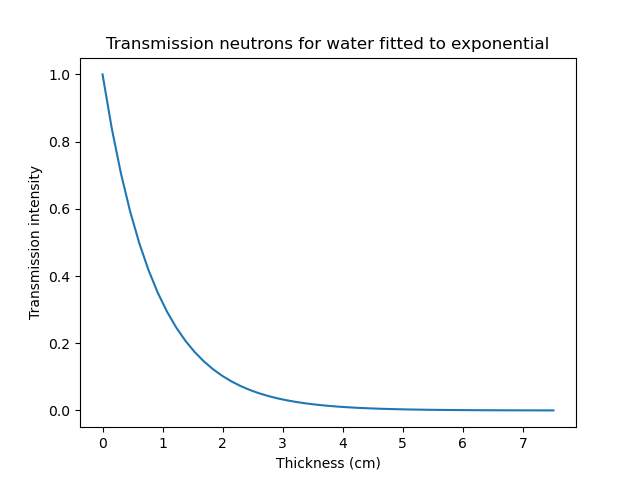

Attenuation length calculated for water as 0.88 +/- 0.04 cm compared to theoretical mean free path 0.29 cm. 
 Reduced chi squared for these data is 2.62


<IPython.core.display.Javascript object>


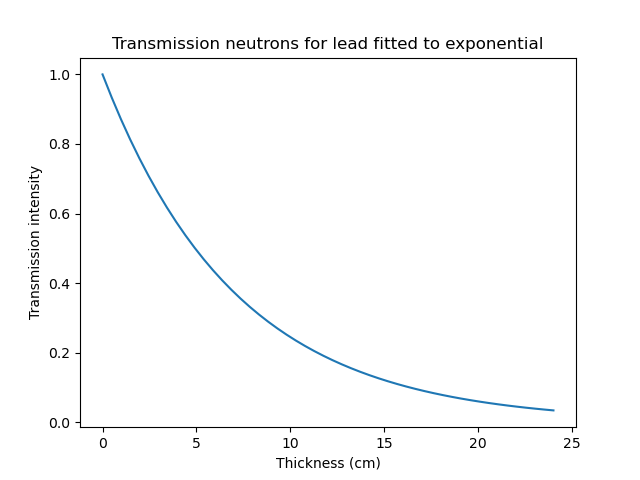

Attenuation length calculated for lead as 7.11 +/- 0.13 cm compared to theoretical mean free path 2.66 cm. 
 Reduced chi squared for these data is 5.60


<IPython.core.display.Javascript object>


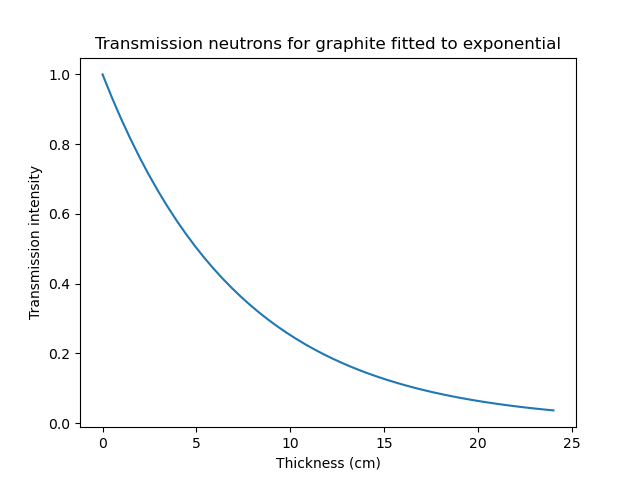

Attenuation length calculated for graphite as 7.26 +/- 0.09 cm compared to theoretical mean free path 2.52 cm. 
 Reduced chi squared for these data is 12.15
------------------------------------------------------------------------------------------------
Graphs of fitted transmitted intensity against thickness for water, graphite and lead. Zero transmission
thickness values have been removed
Thicknesses for water, each run with 2500 neutrons for 5 repeats
[0.01 0.76 1.51 2.26 3.01 3.76 4.51 5.26 6.01 6.76 7.51] cm
Thicknesses for graphite:
[1.000e-02 2.010e+00 4.010e+00 6.010e+00 8.010e+00 1.001e+01 1.201e+01
 1.401e+01 1.601e+01 1.801e+01 2.001e+01 2.201e+01 2.401e+01] cm
Thicknesses for lead:
[1.000e-02 2.010e+00 4.010e+00 6.010e+00 8.010e+00 1.001e+01 1.201e+01
 1.401e+01 1.601e+01 1.801e+01 2.001e+01 2.201e+01 2.401e+01] cm


In [19]:

def calc_red_chi(data, data_fit, data_sigma, dof):
    "Accepts an array of data values, fitted data values, stds for the data and the degrees of freedom"
    "Returns the reduced chisquared to compare the goodness of fit."
    
    return sum(((data-data_fit)/data_sigma)**2)/(len(data)-(dof+1))

def exponential_function(distance, attenuation_length):
    "Functions for the above equation in markdown cell. To be used in scipy curve fit"
    
    return np.exp(-distance/attenuation_length)

def exponential_fit(transmission_neutrons, thicknesses, std, title, theoretical_val):
    "Fits the above equation to the transmitted intensity values, using the standard deviation calculated from the"
    "repeats as a weighting for the fit."
    "Accepts the transmission data, thickness and std. "
    "Also accepts title of the material and the theoretical_val to compare on the graphs."
    "Plots the resulting curve and prints the attenuation length."
    
    expon_fit, errors = curve_fit(
        exponential_function, thicknesses, transmission_neutrons, p0=[2], sigma=std/transmission_neutrons, absolute_sigma=True)
    
    exponential_fig = plt.figure()
    
    exponential = exponential_fig.add_subplot(111)
    
    #set an array of x values to fit the curve to and plot
    x_values = np.linspace(0, np.amax(thicknesses), num=50)
        
    exponential.plot(x_values,  exponential_function(x_values, expon_fit))
    
    exponential.set_title('Transmission neutrons for ' + title + ' fitted to exponential')
    
    exponential.set_xlabel('Thickness (cm)')
    
    exponential.set_ylabel('Transmission intensity')  
    
    #find reduced chi squared 
    red_chi = calc_red_chi(
            transmission_neutrons, exponential_function(thicknesses, expon_fit), std/transmission_neutrons, 1)

    print('Attenuation length calculated for', title, 'as {0:4.2f} +/- {1:4.2f} cm compared to theoretical mean'
          ' free path {2:4.2f} cm. \n Reduced chi squared for these data is {3:4.2f}'.format(
        float(expon_fit), float(np.sqrt(np.diag(errors))), theoretical_val, red_chi))


#fit the expoential to each material
exponential_fit(trans_water, thicknesses_w, trans_std_w,  'water', mean_free_path_w2)

exponential_fit(trans_lead, thicknesses_l,  trans_std_l, 'lead',  mean_free_path_l)

exponential_fit(trans_graphite, thicknesses_g,  trans_std_g,  'graphite',  mean_free_path_g)

#print graph parameters
print('------------------------------------------------------------------------------------------------')
print('Graphs of fitted transmitted intensity against thickness for water, graphite and lead. Zero transmission')
print('thickness values have been removed')
print('Thicknesses for water, each run with 2500 neutrons for 5 repeats')
print(thicknesses_w, 'cm')
print('Thicknesses for graphite:')
print(thicknesses_g, 'cm')
print('Thicknesses for lead:')
print(thicknesses_l, 'cm')


## Discussion

The expected expontial shape is seen. The theoretically calculated values from Equation (6) are compared to the calculated mean free path from $exp(-x/\lambda)$. The uncertainty for the attenuation length was calculated using the standard deviations from 5 repeats and weighting the curve fit.

There is a significant difference between the theoretical mean free path and calculated attenuation length, the mean free path was calculated to be roughly a quarter of the size for each. It should be stated that the mean free path from Equation (6) is the survival length for a single step, not the net attenuation length resulting from all scattering processes from many particles. The attenuations lengths calculated are specifically for when scattering is occuring for the neutrons, not the nominal mean free path value. They still act as a bench mark for the relative expected size of the attenuation length.

The values calculated show that water has by far the lowest attenuation length, with roughly a tenth compared to lead and graphite. A scattering cross section of 103 barn, ten times higher than lead and twenty times for graphite, could account for this. The primary reason for particle death for water was also reflection, furthering the evidence that the scattering probability in water is causing the high attenuation length. 

Attenuation lengths for graphite and lead are relatively similar, with similar standard deviation. The larger density and scattering cross section for lead, 11.22 barn compared to 4.74 barn, is balanced by the much lower absorbtion cross section for graphite, meaning more particles are reflected. The neutron fraction graphs show that lead has a higher absorbtion fraction at higher thicknesses, while graphite has the higher reflection rate. The two interaction lead to the materials having a similar attenuation length.

The reduced chi-squared for each plot are reasonable, showing a values within the order of 1. Reasons the fits are not perfect will be discussed after a polyfit is taken.

## Polyfitting
It is debatable whether fitting to an exponential is an accurate way of determining the attenuation lengths. Fitting exponentials are highly sensitive to start parameters and deviations from exponential shapes. Considering water has such a high scattering rate (as seen in the shield simulation for water with 1000 neutrons) it is highly liable to deviations from the correct value. Thus, an additional method used previously will be employed to make a further analysis on the attenuation lenghts, by plotting $log(transission)$ against thickness. This can be matched to 

$T = T_0e^{\frac{-x}{\lambda}}$, hence

$log(T) = \frac{-x}{\lambda}$  

where $T$ is the percent transmission and $\lambda$ is the attenuation length. The term $log(T_0)$ is equal to zero, since the initial transmission rate at $x=0$ is 1. The attenuation length can be found via polyfitting to find the gradient. Once again, the polyfit will be weighted with standard deviations resulting from 10 repeats of each neutron number.

<IPython.core.display.Javascript object>


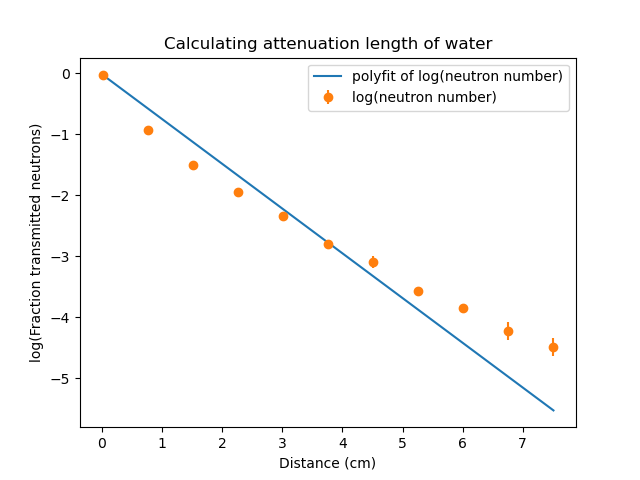

Attenuation length calculated as 1.363 +/- 0.043 cm. 
Reduced chi squared for these data is 12.15


<IPython.core.display.Javascript object>


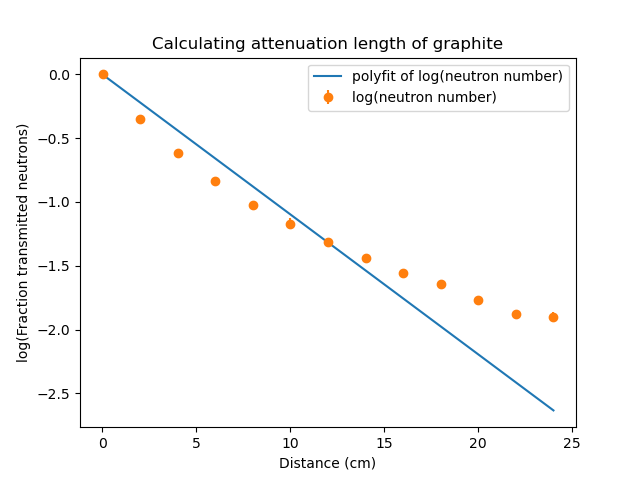

Attenuation length calculated as 9.116 +/- 0.007 cm. 
Reduced chi squared for these data is 41.98


<IPython.core.display.Javascript object>


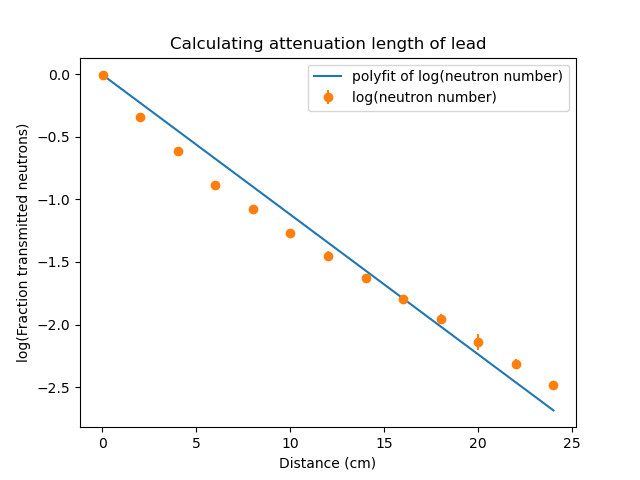

Attenuation length calculated as 8.950 +/- 0.004 cm. 
Reduced chi squared for these data is 19.50
Graphs of log(transmission intensity) against thickness for the respective material. Blue line is polyfit of the data and   orange dots are the distributed log(transmission) points. Water uses a lower range of thickness values, since the 
 scattering probability is much higher.


In [20]:

def polyfitting_lengths(thicknesses, transmitted_fraction, transmitted_std, title):
    "Accepts the results of the vary_thickness function to find the polyfit of the log of transmitted"
    "neutrons against thickness of material. Weights the polyfit by the mean of the tranmitted fraction"
    "and the standard deviation of each."
    "Calls calc_red_chi to produce chi_squared for the data"
    
    #find the gradient of the relationship discussed in the above markdown cell
    polyfit_2, covr_2 = np.polyfit(thicknesses, np.log(transmitted_fraction), deg=1, full=False, cov=True, w=transmitted_fraction/transmitted_std)

    polyval_2 = np.polyval(polyfit_2,  thicknesses)

    mfp_error_2 = np.sqrt(np.diag(covr_2))[0]
    
    #plot the polyfit and log data
    plot_meanpath(thicknesses, np.log(transmitted_fraction), polyval_2, transmitted_std/transmitted_fraction, 1, title)
    
    #Find the reduced chi-squared of the fit
    red_chi = calc_red_chi(
        transmitted_fraction, np.exp(thicknesses*polyfit_2[0]), transmitted_std/transmitted_fraction, 1)
    
    print('Attenuation length calculated as {0:4.3f} +/- {1:4.3f} cm. \n'
          'Reduced chi squared for these data is {2:4.2f}'.format(-1/polyfit_2[0], mfp_error_2, red_chi))


polyfitting_lengths(thicknesses_w, trans_water, trans_std_w, 'water')

polyfitting_lengths(thicknesses_g, trans_graphite, trans_std_g, 'graphite')

polyfitting_lengths(thicknesses_l, trans_lead, trans_std_l, 'lead')
print('Graphs of log(transmission intensity) against thickness for the respective material.'
     ' Blue line is polyfit of the data and   orange dots are the distributed log(transmission) points.'
     ' Water uses a lower range of thickness values, since the \n scattering probability is much higher.')

## Discussion
Log of neutron transmission for 1000 neutrons and 10 repeats is shown above for each of the materials at a range of thicknesses. The thickness range was varied until a satisfactory exponential curve was formed. The number of repeats and neutrons was also varied until a linear relationship was observed from the log graphs. In a similar way to previous polyfit methods, the normalised standard deviation was used to weight the polyfit.

Error bars are larger for the low end of the data points, possibly because, as thickness increases, the number of scatters, hence variability of outcome, increases. This could have been reduced by taking more repeats at higher neutron numbers. The error provided by the covariance matrix appears lower than expected. 

The exponential fit, in comparison, produced larger errors and smaller attenuation lengths. The exponential fitting appears subject to a higher sensitivity to initial conditions and thickness range. However, the reduced chi-squares for the polyfit graphs are in general higher, showing more deviation from the expected result.

Each graph presents a slight 'bend' against the polyfit line. This is due to very small sample size taken for the neutrons. There is too much variance at high thicknesses to be very statistically accurate. Many neutrons would have to be simulated to perfectly fit the polyfit line. 

The uncertainty in the calculated attenuation length provided by polyfit are lower than expected, and compared to the exponential fitting. It is unclear why this is, although the statistcal uncertainty of particle transmission discussed above may play a role. 



# Transmission of neutrons through multiple boundries
The Woodcock method will be used to simulate the path of neutrons through multiple layers of material with different mean free paths. This will be performed in the following way: 

- A step size will be generated using the distribution $s_i = - \lambda_Tlog(u_i)$, where $\lambda_T = 1/max( \Sigma _1 , \Sigma_2)$ where 1 and 2 denote the interaction cross-sections of the different materials.
- If the particle is in the slab with the smaller cross-section, generate a random number between 1 and 0 and, via Equation (11), check if it is bigger
- If yes, perform a fictious step, in which the particle does not change direction or become absorbed, otherwise perform the same procedure as the previous case (scatter or absorb)
- If the particle is in the larger cross-setion, simply perform the standard procedure

Note that the previous step particle position is saved after an absorbtion. This is to prevent the particle stepping out of one material into another while being absorbed, hence casuing the particle history calculation to be incorrect. This is a minor assumption of the function.

The key idea of this process is that it is much less computationally demanding to only consider the smaller mean free path material, and simply approximate the steps taken in the larger mean free path material. 

An example of a random walk will be shown for graphite and lead, as well as particle histories for 1,000 neutrons.

As a check, an infinite mean free path material (a vacuum) will be placed in front of a lead boundry, and the previous simulations for lead will be compared after 5 repeats.


In [21]:

def woodcock_method(
    mean_free_path_1, mean_free_path_2, absorb_prob_1, absorb_prob_2, 
    neutron_number, thickness_1, thickness_2, title_1, print_statement):
    "Accepts scattering properties of each material, along with the neutron number and title."
    "Calls the plotting function used previously to plot the final positions of the neutrons or a particle walk."
    "Calls the fraction_history function to return the number of absorbed transmitted and reflected neutrons "
    "for each material."
    "Follows the method to find the particle outcomes as explained in the markdown cell above."
    "print_statement == 1 plots the final positions while print_statment == 2 plots a random walk."
    "print_statement == 0 plots nothing." 
    
    #find the smaller mean free path of the 2 materials
    min_mfp = np.amin([mean_free_path_1, mean_free_path_2])
    
    #call sigma 1 the crosssection that corresponds to the larger mean free path
    sigma_1 = 1/np.max([mean_free_path_1, mean_free_path_2])
    
    sigma_2 = 1/min_mfp
    
    #determine in which region the meanfreepath is smallest, hence which absorbing probability to use
    if min_mfp == mean_free_path_1:
        
        first_material_denser = 1
        
        denser_absorb_prob = absorb_prob_1
        
    else:
        
        first_material_denser = 0
        
        denser_absorb_prob = absorb_prob_2

    neutron_array = np.arange(0, neutron_number)
    
    #set an array of final positions to record
    final_positions_x = np.array([])
    
    final_positions_y = np.array([])
    
    final_positions_z = np.array([])
    
    for _ in neutron_array:

        is_absorbed = 0
        
        i = 0 #number of steps
        
        #set up empty arrays for coordinates
        coord_x = np.array([])

        coord_y = np.array([])

        coord_z = np.array([])
        
        #set intitial coordinates
        coord_x = np.append(coord_x, 0)

        coord_y = np.append(coord_y, 0.05)

        coord_z = np.append(coord_z, 0.05)
     
        while is_absorbed == 0:
                  
            rand_x = np.random.uniform(0,1)

            #generate random step length distributed exponentially
            X = -min_mfp*np.log(rand_x)
            
            #travels only in x direction on first contact
            if i==0:
                
                x_step = 1
                
                y_step = 0
                
                z_step = 0
            
            #determine if neutron is in the larger mfp area 
            if ((0 <= coord_x[i] < thickness_1 and first_material_denser == 0) or 
                (thickness_1 <= coord_x[i] < (thickness_1 + thickness_2) and first_material_denser == 1)):

                u_j = np.random.uniform(0,1)
                 
                #If yes, generate a random number. If this random number is greater than the sigma fraction, 
                #perform fictitious displacement, with the same direction and no interaction with the shield
                if u_j > (sigma_1/(sigma_1+sigma_2)):
                    
                    i = i + 1
                    
                    coord_x = np.append(coord_x, coord_x[i-1]+X*x_step)

                    coord_y = np.append(coord_y, coord_y[i-1]+X*y_step)

                    coord_z = np.append(coord_z, coord_z[i-1]+X*z_step)
                                        
                    #check particle has left the barriers
                    if coord_x[i] < 0 or coord_x[i] > (thickness_2 + thickness_1):
                        
                        final_positions_x = np.append(final_positions_x, coord_x[i])

                        final_positions_y = np.append(final_positions_y, coord_y[i])

                        final_positions_z = np.append(final_positions_z, coord_z[i])

                        is_absorbed = 1 #ends the loop for this particular neutron
                    
                    #repeat the cycle with the same direction
                    else:
                        
                        is_absorbed = 0
                        
                        
                #If the random number is lower than the sigma fraction, take a step as normal                                                   
                else:
                    
                    #set the inital direction. Must be confirmed repeatedly since the step direction must change
                    #before the step can take place when a normal step is taken.
                    if i == 0:
                        
                        x_step = 1
                
                        y_step = 0

                        z_step = 0
                        
                    else:
                        
                        x_step, y_step, z_step = sphere_plotting(1)
                        
                    i = i + 1
                    
                    coord_x = np.append(coord_x, coord_x[i-1]+X*x_step)

                    coord_y = np.append(coord_y, coord_y[i-1]+X*y_step)

                    coord_z = np.append(coord_z, coord_z[i-1]+X*z_step)

                    #check the particle has left the barriers  
                    if coord_x[i] < 0 or coord_x[i] > (thickness_2 + thickness_1):

                        final_positions_x = np.append(final_positions_x, coord_x[i])

                        final_positions_y = np.append(final_positions_y, coord_y[i])

                        final_positions_z = np.append(final_positions_z, coord_z[i])

                        is_absorbed = 1 #ends the loop for this particular neutron
                    
                    #kill the neutron via absorbtion, taking the previous position term 
                    elif np.random.uniform(0,1) < denser_absorb_prob: 

                        final_positions_x = np.append(final_positions_x, coord_x[i-1])

                        final_positions_y = np.append(final_positions_y, coord_y[i-1])

                        final_positions_z = np.append(final_positions_z, coord_z[i-1])

                        is_absorbed = 1 #ends the loop for this particular neutron
                        
                    else:
                        
                        is_absorbed = 0 #repeat the cycle
                        
            #take a step as normal if particle is in the smaller mfp region             
            else:
                
                if i == 0:
                    
                    x_step = 1

                    y_step = 0

                    z_step = 0
                    
                else:
                    
                    x_step, y_step, z_step = sphere_plotting(1)

                i = i + 1

                coord_x = np.append(coord_x, coord_x[i-1]+X*x_step)

                coord_y = np.append(coord_y, coord_y[i-1]+X*y_step)

                coord_z = np.append(coord_z, coord_z[i-1]+X*z_step)


                #check the particle has left the barriers  
                if coord_x[i] < 0 or coord_x[i] > (thickness_2 + thickness_1):

                    final_positions_x = np.append(final_positions_x, coord_x[i])

                    final_positions_y = np.append(final_positions_y, coord_y[i])

                    final_positions_z = np.append(final_positions_z, coord_z[i])

                    is_absorbed = 1 #ends the loop for this particular neutron
                    
                #check if particle absorbed- save final postition as previous step, otherwise some particles
                #are considered to be absorbed in the incorrect material
                elif np.random.uniform(0,1) < denser_absorb_prob: 

                    final_positions_x = np.append(final_positions_x, coord_x[i-1])

                    final_positions_y = np.append(final_positions_y, coord_y[i-1])

                    final_positions_z = np.append(final_positions_z, coord_z[i-1])

                    is_absorbed = 1 #ends the loop for this particular neutron  
                    
                else:
                    
                    is_absorbed = 0 #repeat
                    
        #plot random walk, now woodcock = 1 and print_statement = 2    
        if print_statement == 2:
                 
                 plot_final_positions(thickness_1, thickness_2, coord_x, coord_y, coord_z, title_1, print_statement, 1)
                    
    #plot final positions, now woodcock = 1 and print_statement = 1  
    if print_statement == 1:
    
        plot_final_positions(thickness_1, thickness_2, final_positions_x, final_positions_y, final_positions_z, title_1, print_statement, 1)

    #find neutron histories and return them. woodcock = 1
    neutron_data = fraction_history(final_positions_x, title_1, print_statement, thickness_1, thickness_2, neutron_number, 1)
    
    return neutron_data

## 1000 neutrons through graphite and lead
The Woodcock method will be demonstrated with graphite and lead. A visual plot below shows the result of 1000 neutrons being bombarded at a 10 cm section of both graphite and lead, with graphite in front.

<IPython.core.display.Javascript object>


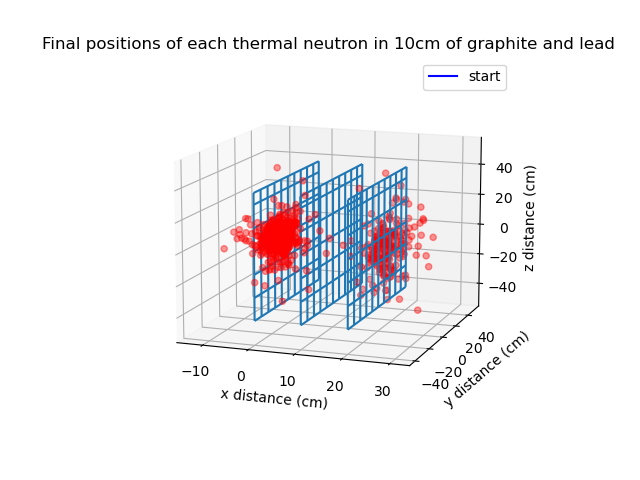

Thickness: 20 cm
Total neutrons 1000
Fraction of absorbed neutrons for graphite and lead in first material is 0.01. Neutron number: 15 +/-   4
Fraction of absorbed neutrons for graphite and lead in second material is 0.00. Neutron number: 2 +/-   1
Fraction of reflected neutrons for graphite and lead  is 0.76. Neutron number: 761 +/-  28
Fraction of transmitted neutrons for graphite and lead  is 0.22. Neutron number: 222 +/-  15
Blue wire mesh shows the walls of the material. Red counters show final position. 10 cm of graphite in first position, 10cm of lead in second.

 Red counters: 
 -behind the start position show reflected neutrons,
 -passed the third wall show transmitted  
 -within the shield absorbed neutrons  


In [22]:
woodcock_method(
    mean_free_path_g, mean_free_path_l, prob_absorb_g, prob_absorb_l, 1000, THICKNESS, THICKNESS, 'graphite and lead', 1);
print('Blue wire mesh shows the walls of the material.'
     ' Red counters show final position. 10 cm of graphite in first position, 10cm of lead in second.')
print('\n Red counters: \n -behind the start position show reflected neutrons,'
      '\n -passed the third wall show transmitted  \n -within the shield are absorbed neutrons  ')

The fraction data for 1000 neutrons are shown above for graphite and lead. The simulation shows very little absorbtion, with roughly 80% of particles deaths resulting from reflection. This could be due to the fact both materials have very high scattering probabilities.

## Example of a random walk for an individual neutron in the Woodcock method
An example of one neutron random walk will be shown for the previous example. The user is once again encouraged to re-run this cell to observe the walk of the particle for different interactions.

<IPython.core.display.Javascript object>


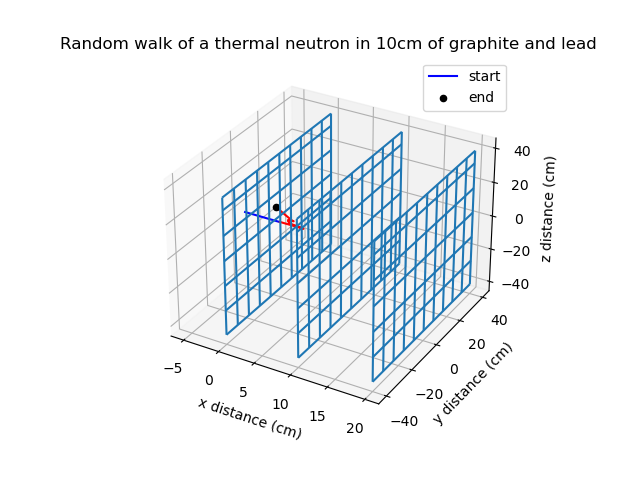

The particle ended the random walk via reflection
20 cm of graphite and lead
10 cm of lead, 10cm of graphite 
Blue wire mesh shows the walls of the material. Red line shows particle walk. First material is graphite, second is lead


In [23]:
woodcock_method(
    mean_free_path_g, mean_free_path_l, prob_absorb_g, prob_absorb_l, 1, THICKNESS, THICKNESS, 'graphite and lead', 2);
print('10 cm of lead, 10cm of graphite \n'
      'Blue wire mesh shows the walls of the material. '
      'Red line shows particle walk. First material is graphite, second is lead')

## Testing the Woodcock method
To test whether the Woodcock method is functioning as intended, in the same procedure as the single material case, a material with infinite mean free path and 0 absorbtion chance (a perfect vacuum) is set against lead. The observed random walk should show reflection at a distinct angle at the boundry, with neutrons occasionally entering the lead and being absorbed or transmitted. 

### Particle walk

<IPython.core.display.Javascript object>


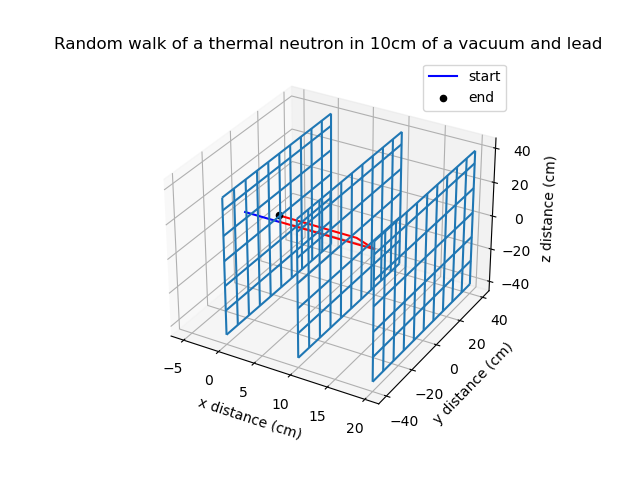

The particle ended the random walk via reflection
20 cm of a vacuum and lead
10 cm of vacuum, 10cm of lead 
Blue wire mesh shows the walls of the material. Red line shows particle walk. First material is a vacuum, second is lead


In [24]:
woodcock_method(np.inf, mean_free_path_l, 0, prob_absorb_l, 1, THICKNESS, THICKNESS, 'a vacuum and lead', 2);
print('10 cm of vacuum, 10cm of lead \n'
      'Blue wire mesh shows the walls of the material.'
      ' Red line shows particle walk. First material is a vacuum, second is lead')

Repeat runnings of this simulation will show the particle reflecting at sharp and straight angles away from the shield. If the particle enters the lead, it will either exit the material once and become reflected or transmitted. Once it has left the material, on either side, it will not return, demonstrating the effectiveness of the Woodcock method, since there will be no scattering in the vacuum.

### Comparing with lead
The woodcock method with the same experimental set up will be simulated (one material is a vacuum and one is 10cm of lead). The results for previous Monte Carlo simulations for lead should match for the same amount of neutrons.

<IPython.core.display.Javascript object>


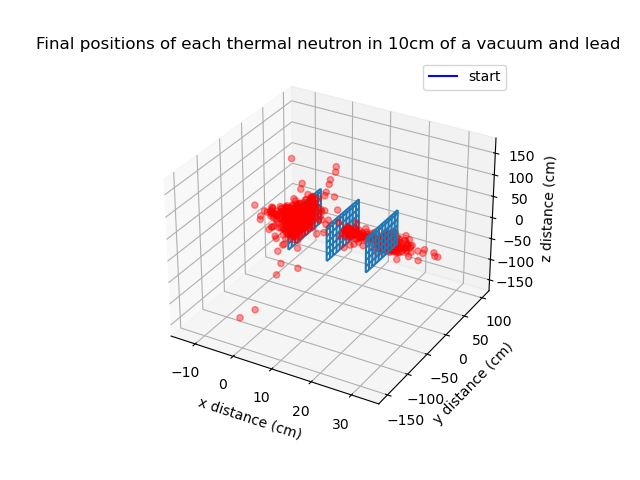

Thickness: 20 cm
Total neutrons 1000
Fraction of absorbed neutrons for a vacuum and lead in first material is 0.00. Neutron number: 0 +/-   0
Fraction of absorbed neutrons for a vacuum and lead in second material is 0.09. Neutron number: 93 +/-  10
Fraction of reflected neutrons for a vacuum and lead  is 0.62. Neutron number: 625 +/-  25
Fraction of transmitted neutrons for a vacuum and lead  is 0.28. Neutron number: 282 +/-  17
Blue wire mesh shows the walls of the material. Red counters show final position. A vacuum is placed in front of lead. Note the absence of absorbtion in the first layer. 

 Red counters: 
 -behind the start position show reflected neutrons,
 -passed the third wall show transmitted  
 -within the shield absorbed neutrons  


In [25]:
woodcock_method(np.inf, mean_free_path_l, 0, prob_absorb_l, 1000, THICKNESS, THICKNESS, 'a vacuum and lead', 1);
print('Blue wire mesh shows the walls of the material.'
      ' Red counters show final position. A vacuum is placed in front of lead.' 
      ' Note the absence of absorbtion in the first layer. ')
print('\n Red counters: \n -behind the start position show reflected neutrons,'
      '\n -passed the third wall show transmitted  \n -within the shield are absorbed neutrons  ')

In [26]:
calculate_standard_dev(np.inf, mean_free_path_l, 0, prob_absorb_l,
             1000, THICKNESS, THICKNESS, 5, 'a vacuum and lead', 1)

calculate_standard_dev(mean_free_path_l,0, prob_absorb_l, 0,  1000, THICKNESS, 0,  5, 'lead', 0)

------------------------------
After 5 repeats through a vacuum and lead
Thickness one 10  cm and thickness two 10 cm
Total neutrons 1000
Mean absorbed neutrons in first material: 0.00 with standard deviation 0.00. Normal distribution error: 0.00. 
 Fraction absorbed: 0.0000 +/- 0.000
Mean absorbed neutrons in second material 93.00 with standard deviation 11.05. Normal distribution error: 9.64. 
 Fraction absorbed: 0.0930 +/- 0.011
Mean reflected neutrons: 615.20 with standard deviation 23.83. Normal distribution error: 24.80. 
 Fraction reflected: 0.6152 +/- 0.024
Mean transmitted neutrons: 291.80 with standard deviation 26.48. Normal distribution error: 17.08. 
 Fraction transmitted: 0.2918 +/- 0.026
------------------------------
After 5 repeats using lead
Thickness: 10 cm
Total neutrons 1000
Mean absorbed neutrons in first material: 113.00 with standard deviation 7.13. Normal distribution error: 10.63. 
 Fraction absorbed: 0.1130 +/- 0.007
Mean reflected neutrons: 613.40 with stand

### Discussion 
Data above shows 5 repeats for lead using the single material shield simulation, and the Woodcock method.

From the data above is it evident both scenarios are in agreement with each other. There is no absorbtion in the vacuum layer, and the lead mean free path dominates. Most neutron fractions are within 1 standard deviation of each other, hence it can be said with some confidence that the Woodcock method works as intended, with the same results as the single lead layer simulation.

After 5 repeats and taking averages, the statistical fluctuation caused by the random nature of neutron interaction is reduced.

The particle walks appear sensible and show a reasonable spread of neutrons. The key feature is the direct reflection of the neutron in a straight line away from the material, showing that ficticious steps are taking place, and matching that of the single lead case.



## Simulate your own plot

Finally, as an additional feature, the user is encourage to create their own material for simulation. Follow the prompts and oberve neutron bombardment for two materials with properties decided by the user.
The cell must be re-run to restart the simulation. The plot will load only when the rest of the notebook has been loaded.

The user is warned that long runtimes may occur for extreme input values!

What would you like the mean free path to be of the first material in cm? 123
What would you like the mean free path to be of the second material to be in cm? 60
What would you like the absorbing probability of the first material to be? 1
What would you like the absorbing probability of the second material to be? 0.5
What would you like the number of neutrons to be in the simulation? 1
What would you like the thickness of the first material to be in the cm? 101
What would you like the thickness of the second material to be in cm? 10


<IPython.core.display.Javascript object>


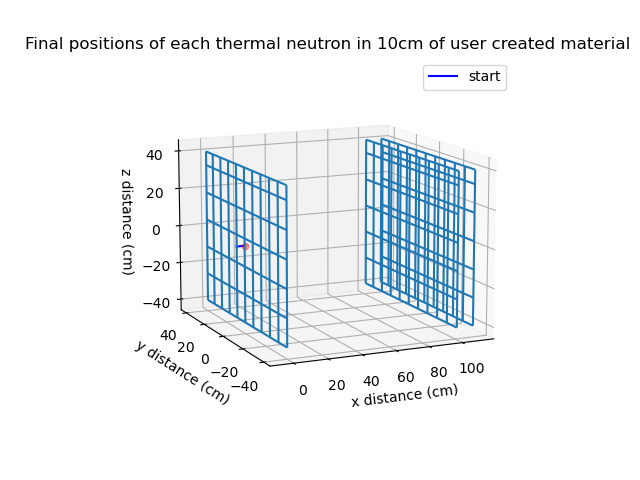

Thickness: 111.0 cm
Total neutrons 1.0
Fraction of absorbed neutrons for user created material in first material is 0.00. Neutron number: 0 +/-   0
Fraction of absorbed neutrons for user created material in second material is 0.00. Neutron number: 0 +/-   0
Fraction of reflected neutrons for user created material  is 1.00. Neutron number: 1 +/-   1
Fraction of transmitted neutrons for user created material  is 0.00. Neutron number: 0 +/-   0
Blue wire mesh shows the walls of the material. Red counters show final position. 


In [27]:

while True:
    while True:
        try:
            MEAN_FREE_PATH_1 = float(input("What would you like the mean free path to be"
                                         " of the first material in cm? "))
            if MEAN_FREE_PATH_1 <= 0:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a number above 0.")
            
    while True:
        try:
            MEAN_FREE_PATH_2 = float(input("What would you like the mean free path to be"
                                         " of the second material to be in cm? "))
            if MEAN_FREE_PATH_2 <= 0:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a number above 0.")
            
    while True:
        try:
            ABSORB_PROB_1 = float(input("What would you like the absorbing probability"
                                         " of the first material to be? "))
            if ABSORB_PROB_1 < 0 or ABSORB_PROB_1 > 1:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a positive number less than one or greater or equal to zero.")

    while True:
        try:
            ABSORB_PROB_2 = float(input("What would you like the absorbing probability"
                                         " of the second material to be? "))
            if ABSORB_PROB_2 < 0 or ABSORB_PROB_2 > 1:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a positive number less than one or greater or equal to zero")


    while True:
        try:
            NEUTRON_NUMBER = float(input("What would you like the number of neutrons to be"
                                         " in the simulation? "))
            if NEUTRON_NUMBER <= 0:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a number above zero.")
    while True:
        try:
            THICKNESS_1 = float(input("What would you like the thickness of the first material to be"
                                         " in the cm? "))
            if THICKNESS_1 <= 0:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a number above zero.")
    while True:
        try:
            THICKNESS_2 = float(input("What would you like the thickness of the second material to be"
                                         " in cm? "))
            if THICKNESS_2 <= 0:
                raise ValueError
            break
        except ValueError:
            print("Invalid input! Must be a number above zero.")
            

    woodcock_method(
        MEAN_FREE_PATH_1, MEAN_FREE_PATH_2, ABSORB_PROB_1, ABSORB_PROB_2, NEUTRON_NUMBER, THICKNESS_1, THICKNESS_2,'user created material', 1)
    print('Blue wire mesh shows the walls of the material.'
          ' Red counters show final position. ')
    break    
    

# Conclusion
Uniformity was confirmed for the random number generator np.random.uniform and compared to other forms of random generation. It was shown that spectral bias does not occur for this function. 

Using this generator, the mean free path of water without scattering was calculated and distributed via Equation(5) over many points. Recalculating the value from a polyfit of binned data, it was shown there was some deviation between the calculated and theoretical value. Taking a single repeat of the data set and comparing to the mean values showed a much closer value of mean free path for the mean data set. An unusually small uncertainty was seen for both polyfit results.

To demonstrate the methods used in particle simulation, a plot of randomly distributed unit vectors and a particle random walk was shown.

A simulation of neutrons fired at a shield of different absorbtion and scattering properties was made and the resulting transmission, reflection and absorbtion fractions were analysed. In doing so, plots of random walks and final positions were generated for water, graphite and lead. The plots show the particles interacting in various ways with the material, each step appears reasonable and follows the expected trends. For instance, the scattering cross section for water is much higher than graphite and lead, and the fraction of relfected neutrons for water was 0.797 +/- 0.004 compared to 0.617 +/- 0.008 and 0.686 +/- 0.003 for lead and graphite. The interaction crossections reflect the material properties well.

The thickness was varied and the observed trend was transmission fraction decreasing and reflection increasing for an increasing thickness. Absorbtion still increases but at a lower rate, especially for lead and water. The transmission fractions were fitted to an exponential distribution and the attenuation lengths for water, graphite and lead were found to be 0.86 +/- 0.05 , 7.27 +/- 0.17 cm and 7.17 +/- 0.16 cm. This was compared to a polyfit of the log of transmitted neutrons, which results in attenuation values 1.34  +/- 0.05, 9.539 +/- 0.01 and 8.47 +/- 0.01 cm. Due to the high volatility of the exponetial fitting, we would expect the polyfit method to be more accurate. The polyfit uncertainties, however, were unusually small and there were slight 'bends' in the data, probably due to a very small sample size. The reduced chi-squares for the polyfit method were also on average higher. 

The neutron number was varied and it was found that standard deviation decreased with neutron number increase, since neutron iterations further away from the mean value were given less statistical weight. A value of 2500 neutrons was used for the remainder of the analysis as this was found to be a good middle ground between computation time and standard deviation in results.

Finally, the Woodcock method was demonsrated such that neutron interaction in more than one material could be modelled. Lead and graphite were placed together and the resulting random walk and final positions were recorded. This method was checked by added an infinite mean free path material in front of lead and analysing the resulting particle motion, as well as comparing the results found from single lead analysis. The absorbtion, reflection and transmission fractions for 5 repeats were found to be in good agreement with each other. For instance the absorbtion fraction for the woodcock and single method were  0.0938 +/- 0.006 and 0.0894 +/- 0.013 respectively, hence it can said with some confince the Woodcock method works as intended.


# References

[1] PHYS20762 Computational Physics 2020-21 course notes

[2] Criteria for the assessment of random number generators. Lothar Afflerbach. Published 7 March 1989 

[3] Neutron approximations https://www.nuclear-power.net/nuclear-power/reactor-physics/neutron-diffusion-theory/ Nuetron Diffusion Theory nuclear-power.net


### Note
There is a known bug with interactive plots in which the plots do not load. The only solution that has worked is to make every plot interactive and allow them all to load. This will cause slight lag, although the problem is fixed.